In [628]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import operator #need this for sorting dicts later
import matplotlib.cm as cm #for colormapping later
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [629]:
pubs_df = pd.read_csv('pubs.csv')
pubs_df = pubs_df.drop(['city','Unnamed: 0'], 1)
#not_restaurant_df = pd.read_csv('not_restaurant.csv')
#not_restaurant_df = not_restaurant_df.drop(['Unnamed: 0','city','distance'], 1)
final_df = pd.read_csv("table2.csv")
final_df = final_df.drop(['Unnamed: 0'], 1)
final_df.describe()

,density,mean_business_rating,rating
count,349.000000,346.000000,349.000000
mean,29.915201,3.749797,3.459885
std,23.738332,0.172239,0.602768
min,0.000000,3.000000,2.000000
25%,10.663381,3.670957,3.000000
50%,21.645072,3.716867,3.500000
75%,47.269018,3.860440,4.000000
max,82.283106,4.500000,4.500000


In [630]:
pubs_df = pubs_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
pubs_df['index_no'] = pubs_df.index

low density - everything <= 15 businesses
high density - everything >35

In [631]:
low_density_df = pd.DataFrame()
low_density_df = final_df.loc[final_df['density'] <= 30]
low_density_df.head()

,density,mean_business_rating,name,rating
0,5.888733,3.918919,McCarthy's Irish Pub,4.0
1,3.819719,3.895833,Boardwalk Place,3.0
2,8.912677,3.660714,The Yellow Griffin,3.0
3,9.071832,3.763158,Cabin Fever,4.5
4,18.143664,4.052632,Bar Homestand,3.5


In [632]:
high_density_df = pd.DataFrame()
high_density_df = final_df.loc[final_df['density'] > 30]
high_density_df.head()

,density,mean_business_rating,name,rating
5,37.242257,3.745726,The Red Room,3.0
7,72.574654,3.632675,The 3 Brewers,3.0
9,47.269018,3.698653,The Blake House,4.0
11,71.619724,3.618889,Duke of Richmond,3.5
12,47.269018,3.698653,The Blake House,4.0


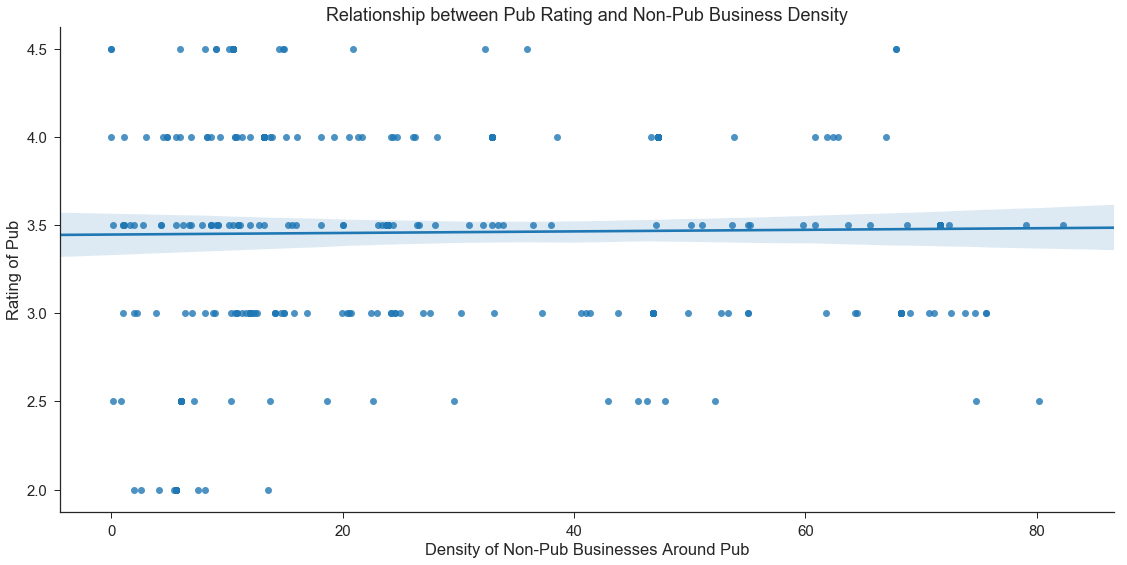

In [633]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="density", y="rating", size=8, data=final_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and Non-Pub Business Density")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

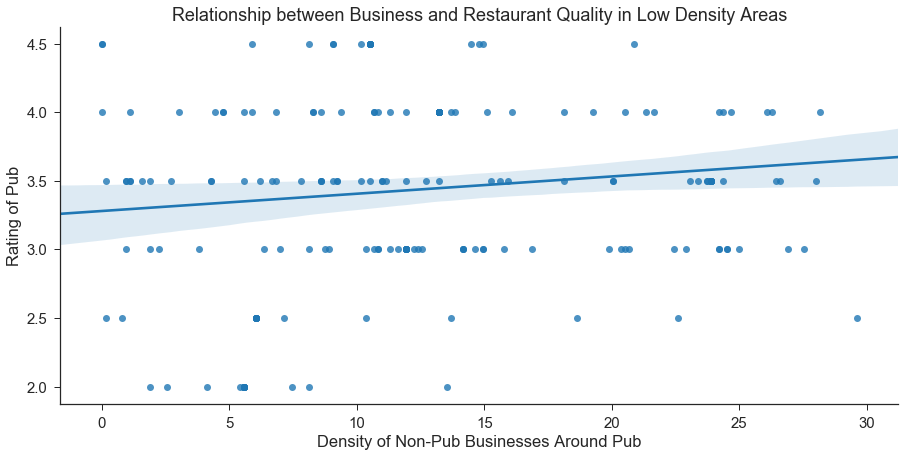

In [634]:
# Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

#Plot
g = sns.lmplot(x="density", y="rating",size=6.5, data=low_density_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Business and Restaurant Quality in Low Density Areas")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

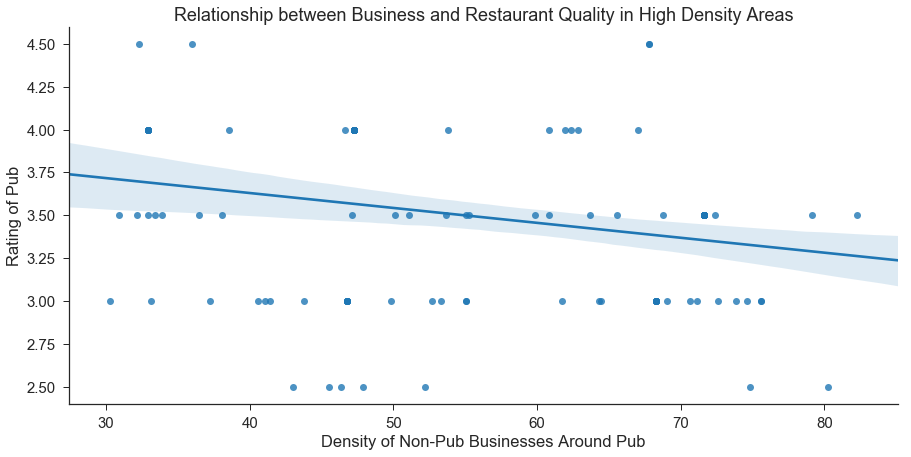

In [635]:
# Set Style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot
g = sns.lmplot(x="density", y="rating",size=6.5, data=high_density_df, aspect=2.0)

# Plot labels
plt.title("Relationship between Business and Restaurant Quality in High Density Areas")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

In [636]:
#rating of pub vs rating of oher pubs.

In [637]:
#rating of pub quality vs rating non-pub density

In [638]:
final_pubs = pd.DataFrame()

def haversine(x):
    
    global pubs_df
    global final_pubs
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
    
    print("our x df inside haversine func is", x)
    
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(pubs_df['latitude']), np.radians(pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   # print("4. pubs gets a new distace col", pubs_df)
    
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = pubs_df
   # print("5. Another new dataframe is init, it equals pubs_df", measure_1)
    measure_1 = measure_1.loc[(pubs_df['distance'] > 0.0) & (pubs_df['distance'] <=1.0)]
    #print("Measure_1 is now", measure_1)
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
    #print("mean biz rating is calc", mean_rating)
    #density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    final_pubs = final_pubs.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return final_pubs


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    print("The line of the DataFrame is", x)
    haversine(x)




The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
0  McCarthy's Irish Pub     M4L 2B5  43.678049 -79.314774  Upper Beach   

                                          categories  stars  review_count  \
0  [u'Pubs', u'Restaurants', u'Bars', u'Irish', u...    4.0             5   

   index_no  
0         0  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
0  McCarthy's Irish Pub     M4L 2B5  43.678049 -79.314774  Upper Beach   

                                          categories  stars  review_count  \
0  [u'Pubs', u'Restaurants', u'Bars', u'Irish', u...    4.0             5   

   index_no  
0         0  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0


The line of the DataFrame is               name postal_code  latitude  longitude neighborhood  \
1  Boardwalk Place     M4W 3L6  43.66301 -79.310898          NaN   

                                          categories  stars  review_count  \
1  [u'American (Traditional)', u'Restaurants', u'...    3.0            13   

   index_no  distance  
1         1  1.702905  
our x df inside haversine func is               name postal_code  latitude  longitude neighborhood  \
1  Boardwalk Place     M4W 3L6  43.66301 -79.310898          NaN   

                                          categories  stars  review_count  \
1  [u'American (Traditional)', u'Restaurants', u'...    3.0            13   

   index_no  distance  
1         1  1.702905  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0


The line of the DataFrame is                  name postal_code   latitude  longitude        neighborhood  \
2  The Yellow Griffin     M6S 1N4  43.651439 -79.475629  Bloor-West Village   

                                          categories  stars  review_count  \
2  [u'Pubs', u'Restaurants', u'Burgers', u'Nightl...    3.0            98   

   index_no  distance  
2         2  13.95484  
our x df inside haversine func is                  name postal_code   latitude  longitude        neighborhood  \
2  The Yellow Griffin     M6S 1N4  43.651439 -79.475629  Bloor-West Village   

                                          categories  stars  review_count  \
2  [u'Pubs', u'Restaurants', u'Burgers', u'Nightl...    3.0            98   

   index_no  distance  
2         2  13.95484  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0


The line of the DataFrame is           name postal_code  latitude  longitude neighborhood  \
3  Cabin Fever     M6P 1A6  43.65535 -79.456719    High Park   

                                          categories  stars  review_count  \
3  [u'Cafes', u'Art Galleries', u'Arts & Entertai...    4.5            26   

   index_no  distance  
3         3  1.653186  
our x df inside haversine func is           name postal_code  latitude  longitude neighborhood  \
3  Cabin Fever     M6P 1A6  43.65535 -79.456719    High Park   

                                          categories  stars  review_count  \
3  [u'Cafes', u'Art Galleries', u'Arts & Entertai...    4.5            26   

   index_no  distance  
3         3  1.653186  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5


The line of the DataFrame is             name postal_code  latitude  longitude   neighborhood  \
4  Bar Homestand     M6G 1M2   43.6626 -79.423726  Christie Pits   

                                          categories  stars  review_count  \
4  [u'Comfort Food', u'Pubs', u'Bars', u'Sports B...    3.5             5   

   index_no  distance  
4         4  2.897132  
our x df inside haversine func is             name postal_code  latitude  longitude   neighborhood  \
4  Bar Homestand     M6G 1M2   43.6626 -79.423726  Christie Pits   

                                          categories  stars  review_count  \
4  [u'Comfort Food', u'Pubs', u'Bars', u'Sports B...    3.5             5   

   index_no  distance  
4         4  2.897132  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5


The line of the DataFrame is            name postal_code  latitude  longitude neighborhood  \
5  The Red Room     M5T 2G8  43.65707 -79.400153    Chinatown   

                                          categories  stars  review_count  \
5  [u'Asian Fusion', u'Nightlife', u'Indian', u'P...    3.0           107   

   index_no  distance  
5         5   2.08112  
our x df inside haversine func is            name postal_code  latitude  longitude neighborhood  \
5  The Red Room     M5T 2G8  43.65707 -79.400153    Chinatown   

                                          categories  stars  review_count  \
5  [u'Asian Fusion', u'Nightlife', u'Indian', u'P...    3.0           107   

   index_no  distance  
5         5   2.08112  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0


The line of the DataFrame is          name postal_code   latitude  longitude         neighborhood  \
6  Scallywags     M4V 1K6  43.687766 -79.394541  Yonge and St. Clair   

                                         categories  stars  review_count  \
6  [u'Pubs', u'Restaurants', u'Nightlife', u'Bars']    3.0            63   

   index_no  distance  
6         6  3.443693  
our x df inside haversine func is          name postal_code   latitude  longitude         neighborhood  \
6  Scallywags     M4V 1K6  43.687766 -79.394541  Yonge and St. Clair   

                                         categories  stars  review_count  \
6  [u'Pubs', u'Restaurants', u'Nightlife', u'Bars']    3.0            63   

   index_no  distance  
6         6  3.443693  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0


The line of the DataFrame is             name postal_code   latitude  longitude   neighborhood  \
7  The 3 Brewers     M5B 1N8  43.655508 -79.380466  Downtown Core   

                                          categories  stars  review_count  \
7  [u'Restaurants', u'Nightlife', u'Bars', u'Pubs...    3.0           218   

   index_no  distance  
7         7  3.776096  
our x df inside haversine func is             name postal_code   latitude  longitude   neighborhood  \
7  The 3 Brewers     M5B 1N8  43.655508 -79.380466  Downtown Core   

                                          categories  stars  review_count  \
7  [u'Restaurants', u'Nightlife', u'Bars', u'Pubs...    3.0           218   

   index_no  distance  
7         7  3.776096  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0


The line of the DataFrame is                                   name postal_code   latitude  longitude  \
8  McSorley's Wonderful Saloon & Grill     M4G 3B6  43.704737 -79.375121   

                    neighborhood  \
8  Mount Pleasant and Davisville   

                                          categories  stars  review_count  \
8  [u'American (Traditional)', u'Bars', u'Restaur...    3.5            29   

   index_no  distance  
8         8  5.489055  
our x df inside haversine func is                                   name postal_code   latitude  longitude  \
8  McSorley's Wonderful Saloon & Grill     M4G 3B6  43.704737 -79.375121   

                    neighborhood  \
8  Mount Pleasant and Davisville   

                                          categories  stars  review_count  \
8  [u'American (Traditional)', u'Bars', u'Restaur...    3.5            29   

   index_no  distance  
8         8  5.489055  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5


The line of the DataFrame is             name postal_code   latitude  longitude  \
36  Duke of Kent     M4P 2C6  43.707933 -79.398269   

                     neighborhood  \
36  Mount Pleasant and Davisville   

                                           categories  stars  review_count  \
36  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    3.5            84   

    index_no  distance  
36        36  1.983741  
our x df inside haversine func is             name postal_code   latitude  longitude  \
36  Duke of Kent     M4P 2C6  43.707933 -79.398269   

                     neighborhood  \
36  Mount Pleasant and Davisville   

                                           categories  stars  review_count  \
36  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    3.5            84   

    index_no  distance  
36        36  1.983741  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code  latitude  longitude neighborhood  \
37  The Irv Gastro Pub         M5A  43.66354 -79.370583          NaN   

                                           categories  stars  review_count  \
37  [u'Burgers', u'Nightlife', u'Gastropubs', u'Pu...    4.5            67   

    index_no  distance  
37        37  5.457951  
our x df inside haversine func is                   name postal_code  latitude  longitude neighborhood  \
37  The Irv Gastro Pub         M5A  43.66354 -79.370583          NaN   

                                           categories  stars  review_count  \
37  [u'Burgers', u'Nightlife', u'Gastropubs', u'Pu...    4.5            67   

    index_no  distance  
37        37  5.457951  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude neighborhood  \
38  Fuel House     M6G 2Y3  43.655666 -79.413881   Palmerston   

                                           categories  stars  review_count  \
38  [u'Nightlife', u'Sandwiches', u'Bars', u'Resta...    4.0            14   

    index_no  distance  
38        38  3.755552  
our x df inside haversine func is           name postal_code   latitude  longitude neighborhood  \
38  Fuel House     M6G 2Y3  43.655666 -79.413881   Palmerston   

                                           categories  stars  review_count  \
38  [u'Nightlife', u'Sandwiches', u'Bars', u'Resta...    4.0            14   

    index_no  distance  
38        38  3.755552  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is          name postal_code   latitude  longitude neighborhood  \
39  The Oxley     M5R 1C4  43.670717 -79.393126    Yorkville   

                                           categories  stars  review_count  \
39  [u'Pubs', u'Nightlife', u'British', u'Bars', u...    4.0            91   

    index_no  distance  
39        39  2.421027  
our x df inside haversine func is          name postal_code   latitude  longitude neighborhood  \
39  The Oxley     M5R 1C4  43.670717 -79.393126    Yorkville   

                                           categories  stars  review_count  \
39  [u'Pubs', u'Nightlife', u'British', u'Bars', u...    4.0            91   

    index_no  distance  
39        39  2.421027  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                               name postal_code   latitude  longitude  \
67  The Pour House Pub And Kitchen     M5R 2E6  43.675708 -79.403853   

   neighborhood                                         categories  stars  \
67    The Annex  [u'Nightlife', u'Bars', u'Canadian (New)', u'R...    3.0   

    review_count  index_no  distance  
67            83        67  1.061163  
our x df inside haversine func is                               name postal_code   latitude  longitude  \
67  The Pour House Pub And Kitchen     M5R 2E6  43.675708 -79.403853   

   neighborhood                                         categories  stars  \
67    The Annex  [u'Nightlife', u'Bars', u'Canadian (New)', u'R...    3.0   

    review_count  index_no  distance  
67            83        67  1.061163  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
68  Dominion Pub and Kitchen     M5A 1T7  43.656944 -79.359167     Corktown   

                                           categories  stars  review_count  \
68  [u'Nightlife', u'Music Venues', u'Restaurants'...    4.0            31   

    index_no  distance  
68        68  4.307528  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
68  Dominion Pub and Kitchen     M5A 1T7  43.656944 -79.359167     Corktown   

                                           categories  stars  review_count  \
68  [u'Nightlife', u'Music Venues', u'Restaurants'...    4.0            31   

    index_no  distance  
68        68  4.307528  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude   neighborhood  \
69  KINKA IZAKAYA ORIGINAL     M5B 2A2  43.660524 -79.378927  Downtown Core   

                                           categories  stars  review_count  \
69  [u'Pubs', u'Japanese', u'Restaurants', u'Bars'...    4.0          1087   

    index_no  distance  
69        69  1.713494  
our x df inside haversine func is                       name postal_code   latitude  longitude   neighborhood  \
69  KINKA IZAKAYA ORIGINAL     M5B 2A2  43.660524 -79.378927  Downtown Core   

                                           categories  stars  review_count  \
69  [u'Pubs', u'Japanese', u'Restaurants', u'Bars'...    4.0          1087   

    index_no  distance  
69        69  1.713494  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
70  Snakes & Lagers     M6G 1A4  43.656257 -79.409585   Palmerston   

                                           categories  stars  review_count  \
70  [u'Pubs', u'Nightlife', u'Restaurants', u'Gast...    3.0            58   

    index_no  distance  
70        70  2.629152  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
70  Snakes & Lagers     M6G 1A4  43.656257 -79.409585   Palmerston   

                                           categories  stars  review_count  \
70  [u'Pubs', u'Nightlife', u'Restaurants', u'Gast...    3.0            58   

    index_no  distance  
70        70  2.629152  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                name postal_code   latitude  longitude  \
71  Madison Avenue Pub & Restaurant     M5R 2S1  43.667846 -79.403299   

   neighborhood                                         categories  stars  \
71    The Annex  [u'Restaurants', u'Bars', u'American (Traditio...    3.0   

    review_count  index_no  distance  
71           123        71  1.392772  
our x df inside haversine func is                                name postal_code   latitude  longitude  \
71  Madison Avenue Pub & Restaurant     M5R 2S1  43.667846 -79.403299   

   neighborhood                                         categories  stars  \
71    The Annex  [u'Restaurants', u'Bars', u'American (Traditio...    3.0   

    review_count  index_no  distance  
71           123        71  1.392772  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude  \
72  The Bishop And Belcher     M4W 3R8  43.670305 -79.382288   

                neighborhood  \
72  Church-Wellesley Village   

                                           categories  stars  review_count  \
72  [u'British', u'Restaurants', u'Nightlife', u'B...    3.5            72   

    index_no  distance  
72        72   1.79294  
our x df inside haversine func is                       name postal_code   latitude  longitude  \
72  The Bishop And Belcher     M4W 3R8  43.670305 -79.382288   

                neighborhood  \
72  Church-Wellesley Village   

                                           categories  stars  review_count  \
72  [u'British', u'Restaurants', u'Nightlife', u'B...    3.5            72   

    index_no  distance  
72        72   1.79294  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code  latitude  longitude neighborhood  \
73  Victory Café     M6G 2L7  43.66376 -79.411781   Palmerston   

                                           categories  stars  review_count  \
73  [u'Restaurants', u'Bars', u'Pubs', u'American ...    3.5           114   

    index_no  distance  
73        73  2.591667  
our x df inside haversine func is             name postal_code  latitude  longitude neighborhood  \
73  Victory Café     M6G 2L7  43.66376 -79.411781   Palmerston   

                                           categories  stars  review_count  \
73  [u'Restaurants', u'Bars', u'Pubs', u'American ...    3.5           114   

    index_no  distance  
73        73  2.591667  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude     neighborhood  \
74  La Saucisserie     M6J 2Z8  43.649105  -79.42055  Little Portugal   

                                           categories  stars  review_count  \
74  [u'Lounges', u'Nightlife', u'American (Traditi...    4.0             9   

    index_no  distance  
74        74  1.788718  
our x df inside haversine func is               name postal_code   latitude  longitude     neighborhood  \
74  La Saucisserie     M6J 2Z8  43.649105  -79.42055  Little Portugal   

                                           categories  stars  review_count  \
74  [u'Lounges', u'Nightlife', u'American (Traditi...    4.0             9   

    index_no  distance  
74        74  1.788718  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude neighborhood  \
75  Janie Jones     M4M 1Z5  43.669049  -79.33719  Leslieville   

                                           categories  stars  review_count  \
75  [u'Bars', u'Restaurants', u'Nightlife', u'Brit...    4.0            10   

    index_no  distance  
75        75  7.371666  
our x df inside haversine func is            name postal_code   latitude  longitude neighborhood  \
75  Janie Jones     M4M 1Z5  43.669049  -79.33719  Leslieville   

                                           categories  stars  review_count  \
75  [u'Bars', u'Restaurants', u'Nightlife', u'Brit...    4.0            10   

    index_no  distance  
75        75  7.371666  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude neighborhood  \
76  Dave's... On St Clair     M6C 1B3  43.681537 -79.427251          NaN   

                                           categories  stars  review_count  \
76  [u'Nightlife', u'Breakfast & Brunch', u'Arts &...    4.0            55   

    index_no  distance  
76        76  7.720767  
our x df inside haversine func is                      name postal_code   latitude  longitude neighborhood  \
76  Dave's... On St Clair     M6C 1B3  43.681537 -79.427251          NaN   

                                           categories  stars  review_count  \
76  [u'Nightlife', u'Breakfast & Brunch', u'Arts &...    4.0            55   

    index_no  distance  
76        76  7.720767  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude  neighborhood  \
77  Mullins'     M6J 2K2  43.655482 -79.411501  Little Italy   

                                           categories  stars  review_count  \
77  [u'Irish', u'Irish Pub', u'Nightlife', u'Resta...    3.0            17   

    index_no  distance  
77        77  3.185715  
our x df inside haversine func is         name postal_code   latitude  longitude  neighborhood  \
77  Mullins'     M6J 2K2  43.655482 -79.411501  Little Italy   

                                           categories  stars  review_count  \
77  [u'Irish', u'Irish Pub', u'Nightlife', u'Resta...    3.0            17   

    index_no  distance  
77        77  3.185715  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude  \
78  Hair of the Dog     M4Y 2C3  43.662947 -79.379593   

                neighborhood  \
78  Church-Wellesley Village   

                                           categories  stars  review_count  \
78  [u'Restaurants', u'Bars', u'Comfort Food', u'B...    4.0           272   

    index_no  distance  
78        78  2.816197  
our x df inside haversine func is                name postal_code   latitude  longitude  \
78  Hair of the Dog     M4Y 2C3  43.662947 -79.379593   

                neighborhood  \
78  Church-Wellesley Village   

                                           categories  stars  review_count  \
78  [u'Restaurants', u'Bars', u'Comfort Food', u'B...    4.0           272   

    index_no  distance  
78        78  2.816197  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
79  Shakey's Sports Pub     M6S 1N8  43.650663 -79.477633      Swansea   

                                           categories  stars  review_count  \
79  [u'Bars', u'Restaurants', u'Canadian (New)', u...    3.5            23   

    index_no  distance  
79        79  8.381903  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
79  Shakey's Sports Pub     M6S 1N8  43.650663 -79.477633      Swansea   

                                           categories  stars  review_count  \
79  [u'Bars', u'Restaurants', u'Canadian (New)', u...    3.5            23   

    index_no  distance  
79        79  8.381903  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                           name postal_code  latitude  longitude neighborhood  \
80  Sofi's Mexican Bar & Grill     M1C 1B6  43.78356 -79.170583  Scarborough   

                                           categories  stars  review_count  \
80  [u'Mexican', u'Restaurants', u'Nightlife', u'B...    4.0            18   

    index_no   distance  
80        80  29.790253  
our x df inside haversine func is                           name postal_code  latitude  longitude neighborhood  \
80  Sofi's Mexican Bar & Grill     M1C 1B6  43.78356 -79.170583  Scarborough   

                                           categories  stars  review_count  \
80  [u'Mexican', u'Restaurants', u'Nightlife', u'B...    4.0            18   

    index_no   distance  
80        80  29.790253  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
81  The Dog's Bollocks     M6J 1G1  43.646009 -79.409121      Niagara   

                                           categories  stars  review_count  \
81  [u'Restaurants', u'Canadian (New)', u'Nightlif...    3.0            67   

    index_no   distance  
81        81  25.269471  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
81  The Dog's Bollocks     M6J 1G1  43.646009 -79.409121      Niagara   

                                           categories  stars  review_count  \
81  [u'Restaurants', u'Canadian (New)', u'Nightlif...    3.0            67   

    index_no   distance  
81        81  25.269471  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude  neighborhood  \
82  Gabby's Junction     M6P 1Z2  43.665473 -79.470215  The Junction   

                                           categories  stars  review_count  \
82  [u'Nightlife', u'Seafood', u'Pubs', u'Canadian...    3.0            19   

    index_no  distance  
82        82   5.58835  
our x df inside haversine func is                 name postal_code   latitude  longitude  neighborhood  \
82  Gabby's Junction     M6P 1Z2  43.665473 -79.470215  The Junction   

                                           categories  stars  review_count  \
82  [u'Nightlife', u'Seafood', u'Pubs', u'Canadian...    3.0            19   

    index_no  distance  
82        82   5.58835  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude neighborhood  \
83  Gabby's Roncesvalles     M6R 2L3  43.644004 -79.448139    High Park   

                                           categories  stars  review_count  \
83  [u'Nightlife', u'Burgers', u'Restaurants', u'S...    2.5             9   

    index_no  distance  
83        83  3.026502  
our x df inside haversine func is                     name postal_code   latitude  longitude neighborhood  \
83  Gabby's Roncesvalles     M6R 2L3  43.644004 -79.448139    High Park   

                                           categories  stars  review_count  \
83  [u'Nightlife', u'Burgers', u'Restaurants', u'S...    2.5             9   

    index_no  distance  
83        83  3.026502  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude neighborhood  \
84  Round the Horn     M6R 2M8  43.649194 -79.449944    High Park   

                                           categories  stars  review_count  \
84  [u'Hot Dogs', u'Beer Bar', u'Nightlife', u'Spo...    3.5            11   

    index_no  distance  
84        84  0.596488  
our x df inside haversine func is               name postal_code   latitude  longitude neighborhood  \
84  Round the Horn     M6R 2M8  43.649194 -79.449944    High Park   

                                           categories  stars  review_count  \
84  [u'Hot Dogs', u'Beer Bar', u'Nightlife', u'Spo...    3.5            11   

    index_no  distance  
84        84  0.596488  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude neighborhood  \
85  Brass Taps Pizza Pub     M4K 1P5  43.677922 -79.349315    Greektown   

                                           categories  stars  review_count  \
85  [u'Pubs', u'Restaurants', u'Bars', u'Nightlife...    3.0            25   

    index_no  distance  
85        85  9.067029  
our x df inside haversine func is                     name postal_code   latitude  longitude neighborhood  \
85  Brass Taps Pizza Pub     M4K 1P5  43.677922 -79.349315    Greektown   

                                           categories  stars  review_count  \
85  [u'Pubs', u'Restaurants', u'Bars', u'Nightlife...    3.0            25   

    index_no  distance  
85        85  9.067029  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude  \
86  Spa My Blends by Clarins     M5V 3G7  43.645359 -79.387128   

              neighborhood                                         categories  \
86  Entertainment District  [u'British', u'Nightlife', u'Beauty & Spas', u...   

    stars  review_count  index_no  distance  
86    4.0            15        86  4.823797  
our x df inside haversine func is                         name postal_code   latitude  longitude  \
86  Spa My Blends by Clarins     M5V 3G7  43.645359 -79.387128   

              neighborhood                                         categories  \
86  Entertainment District  [u'British', u'Nightlife', u'Beauty & Spas', u...   

    stars  review_count  index_no  distance  
86    4.0            15        86  4.823797  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude neighborhood  \
87  Gabby's Food and Fuel     M4E 1E1  43.670955  -79.29668    The Beach   

                                           categories  stars  review_count  \
87  [u'Sports Bars', u'Seafood', u'Restaurants', u...    3.5             7   

    index_no  distance  
87        87  8.141295  
our x df inside haversine func is                      name postal_code   latitude  longitude neighborhood  \
87  Gabby's Food and Fuel     M4E 1E1  43.670955  -79.29668    The Beach   

                                           categories  stars  review_count  \
87  [u'Sports Bars', u'Seafood', u'Restaurants', u...    3.5             7   

    index_no  distance  
87        87  8.141295  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                            name postal_code   latitude  longitude  \
88  The Longest Yard Restaurant     M4S 2M5  43.702655   -79.3877   

                     neighborhood  \
88  Mount Pleasant and Davisville   

                                           categories  stars  review_count  \
88  [u'Bars', u'Sandwiches', u'American (Tradition...    3.0            24   

    index_no  distance  
88        88  8.444361  
our x df inside haversine func is                            name postal_code   latitude  longitude  \
88  The Longest Yard Restaurant     M4S 2M5  43.702655   -79.3877   

                     neighborhood  \
88  Mount Pleasant and Davisville   

                                           categories  stars  review_count  \
88  [u'Bars', u'Sandwiches', u'American (Tradition...    3.0            24   

    index_no  distance  
88        88  8.444361  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                              name postal_code   latitude  longitude  \
89  The 3 Brewers Liberty Village     M6K 3E7  43.638387 -79.420081   

       neighborhood                                         categories  stars  \
89  Liberty Village  [u'Restaurants', u'Breweries', u'Pubs', u'Sand...    3.0   

    review_count  index_no  distance  
89            17        89   7.64638  
our x df inside haversine func is                              name postal_code   latitude  longitude  \
89  The 3 Brewers Liberty Village     M6K 3E7  43.638387 -79.420081   

       neighborhood                                         categories  stars  \
89  Liberty Village  [u'Restaurants', u'Breweries', u'Pubs', u'Sand...    3.0   

    review_count  index_no  distance  
89            17        89   7.64638  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code  latitude  longitude neighborhood  \
90  Paupers Pub     M5S 1Y6  43.66516 -79.410044          NaN   

                                           categories  stars  review_count  \
90  [u'Bars', u'Nightlife', u'Sandwiches', u'Burge...    3.0           113   

    index_no  distance  
90        90   3.09319  
our x df inside haversine func is            name postal_code  latitude  longitude neighborhood  \
90  Paupers Pub     M5S 1Y6  43.66516 -79.410044          NaN   

                                           categories  stars  review_count  \
90  [u'Bars', u'Nightlife', u'Sandwiches', u'Burge...    3.0           113   

    index_no  distance  
90        90   3.09319  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude           neighborhood  \
91  Prenup Pub     M5T 1P9  43.658936 -79.394712  University of Toronto   

                                           categories  stars  review_count  \
91  [u'Gastropubs', u'Nightlife', u'Restaurants', ...    3.5            43   

    index_no  distance  
91        91  1.466559  
our x df inside haversine func is           name postal_code   latitude  longitude           neighborhood  \
91  Prenup Pub     M5T 1P9  43.658936 -79.394712  University of Toronto   

                                           categories  stars  review_count  \
91  [u'Gastropubs', u'Nightlife', u'Restaurants', ...    3.5            43   

    index_no  distance  
91        91  1.466559  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude neighborhood  \
92  Radical Road Brewing     M4M 1L5  43.662633 -79.332479  Leslieville   

                                           categories  stars  review_count  \
92  [u'Restaurants', u'Food', u'Breweries', u'Pubs...    4.5            18   

    index_no  distance  
92        92  5.265107  
our x df inside haversine func is                     name postal_code   latitude  longitude neighborhood  \
92  Radical Road Brewing     M4M 1L5  43.662633 -79.332479  Leslieville   

                                           categories  stars  review_count  \
92  [u'Restaurants', u'Food', u'Breweries', u'Pubs...    4.5            18   

    index_no  distance  
92        92  5.265107  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
93  Pinkerton Snack Bar     M4M 1Z5  43.668972 -79.337279  Leslieville   

                                           categories  stars  review_count  \
93  [u'Nightlife', u'Pubs', u'Bars', u'Cocktail Ba...    4.0            37   

    index_no  distance  
93        93  0.812475  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
93  Pinkerton Snack Bar     M4M 1Z5  43.668972 -79.337279  Leslieville   

                                           categories  stars  review_count  \
93  [u'Nightlife', u'Pubs', u'Bars', u'Cocktail Ba...    4.0            37   

    index_no  distance  
93        93  0.812475  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code   latitude  longitude     neighborhood  \
94  Porter House     M6J 1X8  43.649282 -79.426372  Little Portugal   

                                           categories  stars  review_count  \
94  [u'Bars', u'Nightlife', u'Pubs', u'Vegan', u'R...    4.0            49   

    index_no  distance  
94        94  7.827346  
our x df inside haversine func is             name postal_code   latitude  longitude     neighborhood  \
94  Porter House     M6J 1X8  43.649282 -79.426372  Little Portugal   

                                           categories  stars  review_count  \
94  [u'Bars', u'Nightlife', u'Pubs', u'Vegan', u'R...    4.0            49   

    index_no  distance  
94        94  7.827346  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude neighborhood  \
95  The Grover Pub     M4E 1R4  43.679123 -79.297149  Upper Beach   

                                           categories  stars  review_count  \
95  [u'Food', u'Restaurants', u'Comfort Food', u'B...    3.0            16   

    index_no  distance  
95        95  11.39112  
our x df inside haversine func is               name postal_code   latitude  longitude neighborhood  \
95  The Grover Pub     M4E 1R4  43.679123 -79.297149  Upper Beach   

                                           categories  stars  review_count  \
95  [u'Food', u'Restaurants', u'Comfort Food', u'B...    3.0            16   

    index_no  distance  
95        95  11.39112  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude  neighborhood  \
104  The Only Cafe     M4J 1L9  43.680469 -79.337862  The Danforth   

                                            categories  stars  review_count  \
104  [u'Bars', u'Pubs', u'Cafes', u'Restaurants', u...    4.0            92   

     index_no  distance  
104       104  3.436689  
our x df inside haversine func is               name postal_code   latitude  longitude  neighborhood  \
104  The Only Cafe     M4J 1L9  43.680469 -79.337862  The Danforth   

                                            categories  stars  review_count  \
104  [u'Bars', u'Pubs', u'Cafes', u'Restaurants', u...    4.0            92   

     index_no  distance  
104       104  3.436689  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude        neighborhood  \
105  Korean Cowboy     M4P 2E6  43.708738 -79.399005  Yonge and Eglinton   

                                            categories  stars  review_count  \
105  [u'Specialty Food', u'Bars', u'Restaurants', u...    3.5            62   

     index_no  distance  
105       105  6.036843  
our x df inside haversine func is               name postal_code   latitude  longitude        neighborhood  \
105  Korean Cowboy     M4P 2E6  43.708738 -79.399005  Yonge and Eglinton   

                                            categories  stars  review_count  \
105  [u'Specialty Food', u'Bars', u'Restaurants', u...    3.5            62   

     index_no  distance  
105       105  6.036843  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude    neighborhood  \
106  Brass Taps Pizza Pub     M6H 1A4  43.653787 -79.426135  Dufferin Grove   

                                            categories  stars  review_count  \
106  [u'Bars', u'Pizza', u'Nightlife', u'Pubs', u'R...    3.5            30   

     index_no  distance  
106       106  6.521186  
our x df inside haversine func is                      name postal_code   latitude  longitude    neighborhood  \
106  Brass Taps Pizza Pub     M6H 1A4  43.653787 -79.426135  Dufferin Grove   

                                            categories  stars  review_count  \
106  [u'Bars', u'Pizza', u'Nightlife', u'Pubs', u'R...    3.5            30   

     index_no  distance  
106       106  6.521186  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude neighborhood  \
107  Joy Bistro     M4M 1J3  43.660418 -79.343482  Leslieville   

                                            categories  stars  review_count  \
107  [u'American (New)', u'Pubs', u'Restaurants', u...    3.0           132   

     index_no  distance  
107       107  7.010352  
our x df inside haversine func is            name postal_code   latitude  longitude neighborhood  \
107  Joy Bistro     M4M 1J3  43.660418 -79.343482  Leslieville   

                                            categories  stars  review_count  \
107  [u'American (New)', u'Pubs', u'Restaurants', u...    3.0           132   

     index_no  distance  
107       107  7.010352  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
108  The Irish Shebeen     M9C 5K5  43.650759 -79.603882          NaN   

                                            categories  stars  review_count  \
108  [u'Bars', u'Restaurants', u'Pubs', u'Nightlife...    3.5            23   

     index_no   distance  
108       108  21.991711  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
108  The Irish Shebeen     M9C 5K5  43.650759 -79.603882          NaN   

                                            categories  stars  review_count  \
108  [u'Bars', u'Restaurants', u'Pubs', u'Nightlife...    3.5            23   

     index_no   distance  
108       108  21.991711  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
109  Aft Kitchen & Bar     M4M 1H1  43.658654 -79.350779    Riverdale   

                                            categories  stars  review_count  \
109  [u'American (Traditional)', u'Bars', u'Barbequ...    4.0           130   

     index_no  distance  
109       109  21.36656  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
109  Aft Kitchen & Bar     M4M 1H1  43.658654 -79.350779    Riverdale   

                                            categories  stars  review_count  \
109  [u'American (Traditional)', u'Bars', u'Barbequ...    4.0           130   

     index_no  distance  
109       109  21.36656  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude    neighborhood  \
110  Ossington Stop     M6J 1X4  43.649374 -79.421532  Dufferin Grove   

                                            categories  stars  review_count  \
110  [u'Bars', u'Comfort Food', u'Pubs', u'Canadian...    4.0            12   

     index_no  distance  
110       110  6.056746  
our x df inside haversine func is                name postal_code   latitude  longitude    neighborhood  \
110  Ossington Stop     M6J 1X4  43.649374 -79.421532  Dufferin Grove   

                                            categories  stars  review_count  \
110  [u'Bars', u'Comfort Food', u'Pubs', u'Canadian...    4.0            12   

     index_no  distance  
110       110  6.056746  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
111  Stout Irish Pub     M5A 2L2  43.663839 -79.368944          NaN   

                                            categories  stars  review_count  \
111  [u'Bars', u'Irish', u'Nightlife', u'Restaurant...    4.0           109   

     index_no  distance  
111       111  4.717796  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
111  Stout Irish Pub     M5A 2L2  43.663839 -79.368944          NaN   

                                            categories  stars  review_count  \
111  [u'Bars', u'Irish', u'Nightlife', u'Restaurant...    4.0           109   

     index_no  distance  
111       111  4.717796  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code  latitude  longitude neighborhood  \
112  Gabby's Eatery and Taps     M4I 1E1   43.6506 -79.370425     Corktown   

                                            categories  stars  review_count  \
112  [u'Nightlife', u'Pubs', u'Restaurants', u'Food...    2.5            17   

     index_no  distance  
112       112  1.476546  
our x df inside haversine func is                         name postal_code  latitude  longitude neighborhood  \
112  Gabby's Eatery and Taps     M4I 1E1   43.6506 -79.370425     Corktown   

                                            categories  stars  review_count  \
112  [u'Nightlife', u'Pubs', u'Restaurants', u'Food...    2.5            17   

     index_no  distance  
112       112  1.476546  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude  \
113  Rock 'n' Horse Saloon     M5H 1X6  43.648171 -79.389077   

               neighborhood  \
113  Entertainment District   

                                            categories  stars  review_count  \
113  [u'Soul Food', u'Music Venues', u'Arts & Enter...    3.0            43   

     index_no  distance  
113       113  1.596395  
our x df inside haversine func is                       name postal_code   latitude  longitude  \
113  Rock 'n' Horse Saloon     M5H 1X6  43.648171 -79.389077   

               neighborhood  \
113  Entertainment District   

                                            categories  stars  review_count  \
113  [u'Soul Food', u'Music Venues', u'Arts & Enter...    3.0            43   

     index_no  distance  
113       113  1.596395  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is              name postal_code   latitude  longitude neighborhood  \
114  The Old Nick     M4K 1N2  43.676234 -79.357776    Riverdale   

                                            categories  stars  review_count  \
114  [u'Breakfast & Brunch', u'Pubs', u'Music Venue...    3.0            34   

     index_no  distance  
114       114   4.08572  
our x df inside haversine func is              name postal_code   latitude  longitude neighborhood  \
114  The Old Nick     M4K 1N2  43.676234 -79.357776    Riverdale   

                                            categories  stars  review_count  \
114  [u'Breakfast & Brunch', u'Pubs', u'Music Venue...    3.0            34   

     index_no  distance  
114       114   4.08572  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude  neighborhood  \
115  The Hole In the Wall     M6P 1Y9  43.665337 -79.465149  The Junction   

                                            categories  stars  review_count  \
115  [u'Bars', u'Pubs', u'Nightlife', u'Canadian (N...    4.5           125   

     index_no  distance  
115       115  9.136761  
our x df inside haversine func is                      name postal_code   latitude  longitude  neighborhood  \
115  The Hole In the Wall     M6P 1Y9  43.665337 -79.465149  The Junction   

                                            categories  stars  review_count  \
115  [u'Bars', u'Pubs', u'Nightlife', u'Canadian (N...    4.5           125   

     index_no  distance  
115       115  9.136761  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code   latitude  longitude neighborhood  \
124  6th Street Pub N Grill     M9A 1B8  43.648546  -79.52892    Etobicoke   

                                            categories  stars  review_count  \
124  [u'Nightlife', u'Lounges', u'Gastropubs', u'Re...    3.5            11   

     index_no  distance  
124       124  5.693732  
our x df inside haversine func is                        name postal_code   latitude  longitude neighborhood  \
124  6th Street Pub N Grill     M9A 1B8  43.648546  -79.52892    Etobicoke   

                                            categories  stars  review_count  \
124  [u'Nightlife', u'Lounges', u'Gastropubs', u'Re...    3.5            11   

     index_no  distance  
124       124  5.693732  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code  latitude  longitude  neighborhood  \
125  Rails & Ales Pub     M4J 1L5  43.68137 -79.333974  The Danforth   

                                            categories  stars  review_count  \
125  [u'Restaurants', u'Sports Bars', u'Bars', u'Pu...    3.5             9   

     index_no   distance  
125       125  16.839836  
our x df inside haversine func is                  name postal_code  latitude  longitude  neighborhood  \
125  Rails & Ales Pub     M4J 1L5  43.68137 -79.333974  The Danforth   

                                            categories  stars  review_count  \
125  [u'Restaurants', u'Sports Bars', u'Bars', u'Pu...    3.5             9   

     index_no   distance  
125       125  16.839836  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
126  Let's Be Frank     M5T 2G8  43.657554 -79.400024    Chinatown   

                                            categories  stars  review_count  \
126  [u'Hot Dogs', u'Pubs', u'Comfort Food', u'Food...    4.5            52   

     index_no  distance  
126       126  6.167807  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
126  Let's Be Frank     M5T 2G8  43.657554 -79.400024    Chinatown   

                                            categories  stars  review_count  \
126  [u'Hot Dogs', u'Pubs', u'Comfort Food', u'Food...    4.5            52   

     index_no  distance  
126       126  6.167807  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude neighborhood  \
127  McGugan's     M4M 1Z8  43.669256 -79.335902  Leslieville   

                                            categories  stars  review_count  \
127  [u'Pubs', u'Breakfast & Brunch', u'Sandwiches'...    3.0            26   

     index_no  distance  
127       127   5.56214  
our x df inside haversine func is           name postal_code   latitude  longitude neighborhood  \
127  McGugan's     M4M 1Z8  43.669256 -79.335902  Leslieville   

                                            categories  stars  review_count  \
127  [u'Pubs', u'Breakfast & Brunch', u'Sandwiches'...    3.0            26   

     index_no  distance  
127       127   5.56214  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code  latitude  longitude neighborhood  \
128  Refinery Public House     M8V 1K5  43.59979 -79.509129    Etobicoke   

                                            categories  stars  review_count  \
128  [u'Bars', u'Gastropubs', u'Salad', u'Burgers',...    4.0            32   

     index_no   distance  
128       128  16.531366  
our x df inside haversine func is                       name postal_code  latitude  longitude neighborhood  \
128  Refinery Public House     M8V 1K5  43.59979 -79.509129    Etobicoke   

                                            categories  stars  review_count  \
128  [u'Bars', u'Gastropubs', u'Salad', u'Burgers',...    4.0            32   

     index_no   distance  
128       128  16.531366  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude neighborhood  \
129  Maple Leaf House     M8V 1H2  43.601905 -79.498597    Etobicoke   

                                            categories  stars  review_count  \
129  [u'Pizza', u'Restaurants', u'Seafood', u'Sandw...    3.0             5   

     index_no  distance  
129       129  0.919312  
our x df inside haversine func is                  name postal_code   latitude  longitude neighborhood  \
129  Maple Leaf House     M8V 1H2  43.601905 -79.498597    Etobicoke   

                                            categories  stars  review_count  \
129  [u'Pizza', u'Restaurants', u'Seafood', u'Sandw...    3.0             5   

     index_no  distance  
129       129  0.919312  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude     neighborhood  \
130  Brazen Head Irish Pub     M6K 3P6  43.638544 -79.417144  Liberty Village   

                                            categories  stars  review_count  \
130  [u'Bars', u'Pubs', u'Irish', u'Nightlife', u'R...    3.0           146   

     index_no  distance  
130       130  7.987135  
our x df inside haversine func is                       name postal_code   latitude  longitude     neighborhood  \
130  Brazen Head Irish Pub     M6K 3P6  43.638544 -79.417144  Liberty Village   

                                            categories  stars  review_count  \
130  [u'Bars', u'Pubs', u'Irish', u'Nightlife', u'R...    3.0           146   

     index_no  distance  
130       130  7.987135  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude  neighborhood  \
131  Ted's Collision     M6G 1B2  43.655318 -79.412971  Little Italy   

                                            categories  stars  review_count  \
131  [u'Restaurants', u'Dive Bars', u'Bars', u'Nigh...    3.5            22   

     index_no  distance  
131       131  1.896937  
our x df inside haversine func is                 name postal_code   latitude  longitude  neighborhood  \
131  Ted's Collision     M6G 1B2  43.655318 -79.412971  Little Italy   

                                            categories  stars  review_count  \
131  [u'Restaurants', u'Dive Bars', u'Bars', u'Nigh...    3.5            22   

     index_no  distance  
131       131  1.896937  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude    neighborhood  \
132  Ace & Ale Tap House     M5V 2B5  43.647324 -79.403428  Alexandra Park   

                                            categories  stars  review_count  \
132  [u'Nightlife', u'Bars', u'Hungarian', u'Pubs',...    3.5            15   

     index_no  distance  
132       132   1.19883  
our x df inside haversine func is                     name postal_code   latitude  longitude    neighborhood  \
132  Ace & Ale Tap House     M5V 2B5  43.647324 -79.403428  Alexandra Park   

                                            categories  stars  review_count  \
132  [u'Nightlife', u'Bars', u'Hungarian', u'Pubs',...    3.5            15   

     index_no  distance  
132       132   1.19883  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is          name postal_code   latitude  longitude  neighborhood  \
133  Pour Boy     M6G 1B2  43.655321 -79.413309  Little Italy   

                                            categories  stars  review_count  \
133  [u'Bars', u'American (Traditional)', u'Restaur...    4.0            11   

     index_no  distance  
133       133  1.218344  
our x df inside haversine func is          name postal_code   latitude  longitude  neighborhood  \
133  Pour Boy     M6G 1B2  43.655321 -79.413309  Little Italy   

                                            categories  stars  review_count  \
133  [u'Bars', u'American (Traditional)', u'Restaur...    4.0            11   

     index_no  distance  
133       133  1.218344  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                            name postal_code   latitude  longitude  \
134  Scruffy Murphy's Irish Pub     M4P 1E8  43.708009 -79.393628   

                      neighborhood  \
134  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
134  [u'Cajun/Creole', u'Arts & Entertainment', u'I...    3.0            31   

     index_no  distance  
134       134  6.085559  
our x df inside haversine func is                            name postal_code   latitude  longitude  \
134  Scruffy Murphy's Irish Pub     M4P 1E8  43.708009 -79.393628   

                      neighborhood  \
134  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
134  [u'Cajun/Creole', u'Arts & Entertainment', u'I...    3.0            31   

     index_no  distance  
134       134  6.085559  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude neighborhood  \
135  Wild Wing     M5V 1M9  43.643636 -79.403119      Niagara   

                                            categories  stars  review_count  \
135  [u'Karaoke', u'Pubs', u'Restaurants', u'Nightl...    2.5            17   

     index_no  distance  
135       135   7.19814  
our x df inside haversine func is           name postal_code   latitude  longitude neighborhood  \
135  Wild Wing     M5V 1M9  43.643636 -79.403119      Niagara   

                                            categories  stars  review_count  \
135  [u'Karaoke', u'Pubs', u'Restaurants', u'Nightl...    2.5            17   

     index_no  distance  
135       135   7.19814  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude  \
136  Micro Time Cafe     M4Y 3B2  43.665211 -79.383316   

                 neighborhood  \
136  Church-Wellesley Village   

                                            categories  stars  review_count  \
136  [u'Pubs', u'Italian', u'Breakfast & Brunch', u...    3.0            20   

     index_no  distance  
136       136   2.92195  
our x df inside haversine func is                 name postal_code   latitude  longitude  \
136  Micro Time Cafe     M4Y 3B2  43.665211 -79.383316   

                 neighborhood  \
136  Church-Wellesley Village   

                                            categories  stars  review_count  \
136  [u'Pubs', u'Italian', u'Breakfast & Brunch', u...    3.0            20   

     index_no  distance  
136       136   2.92195  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is          name postal_code   latitude  longitude neighborhood  \
137  Bryden's     M6S 1P7  43.649037  -79.48457      Swansea   

                                            categories  stars  review_count  \
137  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    4.0            55   

     index_no  distance  
137       137  8.728272  
our x df inside haversine func is          name postal_code   latitude  longitude neighborhood  \
137  Bryden's     M6S 1P7  43.649037  -79.48457      Swansea   

                                            categories  stars  review_count  \
137  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    4.0            55   

     index_no  distance  
137       137  8.728272  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
138  Brooklyn Tavern     M4M 1K7  43.661955 -79.335982  Leslieville   

                                            categories  stars  review_count  \
138  [u'Canadian (New)', u'Nightlife', u'Mexican', ...    3.5            59   

     index_no   distance  
138       138  12.614625  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
138  Brooklyn Tavern     M4M 1K7  43.661955 -79.335982  Leslieville   

                                            categories  stars  review_count  \
138  [u'Canadian (New)', u'Nightlife', u'Mexican', ...    3.5            59   

     index_no   distance  
138       138  12.614625  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                  name postal_code   latitude  longitude  \
139  Mayday Malone's Pub & Ristorante     M5R 3G9  43.672482 -79.414371   

       neighborhood                                         categories  stars  \
139  Seaton Village  [u'Nightlife', u'Pubs', u'Bars', u'Italian', u...    3.0   

     review_count  index_no  distance  
139             9       139  6.713848  
our x df inside haversine func is                                  name postal_code   latitude  longitude  \
139  Mayday Malone's Pub & Ristorante     M5R 3G9  43.672482 -79.414371   

       neighborhood                                         categories  stars  \
139  Seaton Village  [u'Nightlife', u'Pubs', u'Bars', u'Italian', u...    3.0   

     review_count  index_no  distance  
139             9       139  6.713848  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude neighborhood  \
140  KINKA IZAKAYA BLOOR     M5S 1Y6  43.665157 -79.410658          NaN   

                                            categories  stars  review_count  \
140  [u'Nightlife', u'Restaurants', u'Pubs', u'Japa...    4.0           351   

     index_no  distance  
140       140  0.872168  
our x df inside haversine func is                     name postal_code   latitude  longitude neighborhood  \
140  KINKA IZAKAYA BLOOR     M5S 1Y6  43.665157 -79.410658          NaN   

                                            categories  stars  review_count  \
140  [u'Nightlife', u'Restaurants', u'Pubs', u'Japa...    4.0           351   

     index_no  distance  
140       140  0.872168  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude  \
141  Kramer's Bar & Grill     M4S 1Z3  43.698638 -79.396331   

                      neighborhood  \
141  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
141  [u'Sandwiches', u'Dive Bars', u'Pubs', u'Resta...    3.0            33   

     index_no  distance  
141       141   3.91175  
our x df inside haversine func is                      name postal_code   latitude  longitude  \
141  Kramer's Bar & Grill     M4S 1Z3  43.698638 -79.396331   

                      neighborhood  \
141  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
141  [u'Sandwiches', u'Dive Bars', u'Pubs', u'Resta...    3.0            33   

     index_no  distance  
141       141   3.91175  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
142  Danny's Pub Scarborough     M1E 2L3  43.762305 -79.183766  Scarborough   

                                            categories  stars  review_count  \
142  [u'Specialty Food', u'Imported Food', u'Bars',...    4.5             4   

     index_no  distance  
142       142  19.26034  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
142  Danny's Pub Scarborough     M1E 2L3  43.762305 -79.183766  Scarborough   

                                            categories  stars  review_count  \
142  [u'Specialty Food', u'Imported Food', u'Bars',...    4.5             4   

     index_no  distance  
142       142  19.26034  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude  \
143  The Rose & Crown     M4P 2C8  43.708607  -79.39841   

                      neighborhood  \
143  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
143  [u'Arts & Entertainment', u'Music Venues', u'P...    3.5            41   

     index_no   distance  
143       143  19.055596  
our x df inside haversine func is                  name postal_code   latitude  longitude  \
143  The Rose & Crown     M4P 2C8  43.708607  -79.39841   

                      neighborhood  \
143  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
143  [u'Arts & Entertainment', u'Music Venues', u'P...    3.5            41   

     index_no   distance  
143       143  19.055596  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude   neighborhood  \
144  O'Grady's Tap & Grill     M5T 1P7  43.658889   -79.3938  Downtown Core   

                                            categories  stars  review_count  \
144  [u'Bars', u'Irish', u'Nightlife', u'Restaurant...    2.5            32   

     index_no  distance  
144       144  5.538574  
our x df inside haversine func is                       name postal_code   latitude  longitude   neighborhood  \
144  O'Grady's Tap & Grill     M5T 1P7  43.658889   -79.3938  Downtown Core   

                                            categories  stars  review_count  \
144  [u'Bars', u'Irish', u'Nightlife', u'Restaurant...    2.5            32   

     index_no  distance  
144       144  5.538574  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code  latitude  longitude neighborhood  \
145  Brass Taps Pizza Pub     M5A 2L2  43.66403 -79.369119  Cabbagetown   

                                            categories  stars  review_count  \
145  [u'Restaurants', u'Nightlife', u'Pizza', u'Pub...    3.0             5   

     index_no  distance  
145       145  2.158728  
our x df inside haversine func is                      name postal_code  latitude  longitude neighborhood  \
145  Brass Taps Pizza Pub     M5A 2L2  43.66403 -79.369119  Cabbagetown   

                                            categories  stars  review_count  \
145  [u'Restaurants', u'Nightlife', u'Pizza', u'Pub...    3.0             5   

     index_no  distance  
145       145  2.158728  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude  neighborhood  \
146  Snakes & Lattes College     M6G 1A5  43.655874 -79.409192  Little Italy   

                                            categories  stars  review_count  \
146  [u'Gastropubs', u'Shopping', u'Tabletop Games'...    3.5            86   

     index_no  distance  
146       146  3.499539  
our x df inside haversine func is                         name postal_code   latitude  longitude  neighborhood  \
146  Snakes & Lattes College     M6G 1A5  43.655874 -79.409192  Little Italy   

                                            categories  stars  review_count  \
146  [u'Gastropubs', u'Shopping', u'Tabletop Games'...    3.5            86   

     index_no  distance  
146       146  3.499539  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is              name postal_code   latitude  longitude neighborhood  \
147  Fox & Fiddle     M5V 1A9  43.640287 -79.394069   City Place   

                                            categories  stars  review_count  \
147  [u'Comfort Food', u'Nightlife', u'Bars', u'Res...    2.5            50   

     index_no  distance  
147       147  2.151222  
our x df inside haversine func is              name postal_code   latitude  longitude neighborhood  \
147  Fox & Fiddle     M5V 1A9  43.640287 -79.394069   City Place   

                                            categories  stars  review_count  \
147  [u'Comfort Food', u'Nightlife', u'Bars', u'Res...    2.5            50   

     index_no  distance  
147       147  2.151222  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is              name postal_code   latitude  longitude neighborhood  \
148  Kornerstones     M1P 2H6  43.763361 -79.291298  Scarborough   

                                            categories  stars  review_count  \
148  [u'Bars', u'Canadian (New)', u'Sports Bars', u...    3.5            12   

     index_no   distance  
148       148  16.188293  
our x df inside haversine func is              name postal_code   latitude  longitude neighborhood  \
148  Kornerstones     M1P 2H6  43.763361 -79.291298  Scarborough   

                                            categories  stars  review_count  \
148  [u'Bars', u'Canadian (New)', u'Sports Bars', u...    3.5            12   

     index_no   distance  
148       148  16.188293  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude   neighborhood  \
149  Beerbistro     M5C 1C4  43.649817 -79.377147  Downtown Core   

                                            categories  stars  review_count  \
149  [u'Bistros', u'American (New)', u'Bars', u'Res...    4.0           511   

     index_no   distance  
149       149  14.548028  
our x df inside haversine func is            name postal_code   latitude  longitude   neighborhood  \
149  Beerbistro     M5C 1C4  43.649817 -79.377147  Downtown Core   

                                            categories  stars  review_count  \
149  [u'Bistros', u'American (New)', u'Bars', u'Res...    4.0           511   

     index_no   distance  
149       149  14.548028  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude neighborhood  \
150  The Feathers Pub     M4E 1S7  43.680686 -79.287543  Upper Beach   

                                            categories  stars  review_count  \
150  [u'Pubs', u'Restaurants', u'British', u'Nightl...    3.5            22   

     index_no  distance  
150       150  8.298616  
our x df inside haversine func is                  name postal_code   latitude  longitude neighborhood  \
150  The Feathers Pub     M4E 1S7  43.680686 -79.287543  Upper Beach   

                                            categories  stars  review_count  \
150  [u'Pubs', u'Restaurants', u'British', u'Nightl...    3.5            22   

     index_no  distance  
150       150  8.298616  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude   neighborhood  \
151  Duke of Somerset     M5G 2K4  43.657773 -79.384143  Downtown Core   

                                            categories  stars  review_count  \
151  [u'British', u'Bars', u'Restaurants', u'Nightl...    3.0            31   

     index_no  distance  
151       151  8.536557  
our x df inside haversine func is                  name postal_code   latitude  longitude   neighborhood  \
151  Duke of Somerset     M5G 2K4  43.657773 -79.384143  Downtown Core   

                                            categories  stars  review_count  \
151  [u'British', u'Bars', u'Restaurants', u'Nightl...    3.0            31   

     index_no  distance  
151       151  8.536557  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                           name postal_code   latitude  longitude  \
152  Irish Embassy Pub & Grill     M5E 1J1  43.648049 -79.377154   

     neighborhood                                         categories  stars  \
152  St. Lawrence  [u'Pubs', u'Restaurants', u'Nightlife', u'Bars...    3.0   

     review_count  index_no  distance  
152           113       152  1.230973  
our x df inside haversine func is                           name postal_code   latitude  longitude  \
152  Irish Embassy Pub & Grill     M5E 1J1  43.648049 -79.377154   

     neighborhood                                         categories  stars  \
152  St. Lawrence  [u'Pubs', u'Restaurants', u'Nightlife', u'Bars...    3.0   

     review_count  index_no  distance  
152           113       152  1.230973  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude neighborhood  \
161  Harbord House     M5S 1H2  43.662454 -79.405476          NaN   

                                            categories  stars  review_count  \
161  [u'Restaurants', u'American (New)', u'Bars', u...    3.5            98   

     index_no  distance  
161       161  2.875597  
our x df inside haversine func is               name postal_code   latitude  longitude neighborhood  \
161  Harbord House     M5S 1H2  43.662454 -79.405476          NaN   

                                            categories  stars  review_count  \
161  [u'Restaurants', u'American (New)', u'Bars', u...    3.5            98   

     index_no  distance  
161       161  2.875597  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude       neighborhood  \
162  Templeton's Cafe     M5T 1N9  43.656876 -79.402908  Kensington Market   

                                            categories  stars  review_count  \
162  [u'Burgers', u'Asian Fusion', u'Restaurants', ...    3.5            52   

     index_no  distance  
162       162  0.656632  
our x df inside haversine func is                  name postal_code   latitude  longitude       neighborhood  \
162  Templeton's Cafe     M5T 1N9  43.656876 -79.402908  Kensington Market   

                                            categories  stars  review_count  \
162  [u'Burgers', u'Asian Fusion', u'Restaurants', ...    3.5            52   

     index_no  distance  
162       162  0.656632  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                          name postal_code   latitude  longitude neighborhood  \
163  Fox and Fiddle Yorkmills     M3B 1Y6  43.754756 -79.349992          NaN   

                                            categories  stars  review_count  \
163  [u'Music Venues', u'Restaurants', u'Pubs', u'C...    3.0            40   

     index_no   distance  
163       163  11.755704  
our x df inside haversine func is                          name postal_code   latitude  longitude neighborhood  \
163  Fox and Fiddle Yorkmills     M3B 1Y6  43.754756 -79.349992          NaN   

                                            categories  stars  review_count  \
163  [u'Music Venues', u'Restaurants', u'Pubs', u'C...    3.0            40   

     index_no   distance  
163       163  11.755704  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude neighborhood  \
164  Joker Cafe     M6K 3H6  43.634444 -79.425603     Parkdale   

                                            categories  stars  review_count  \
164  [u'Pubs', u'Restaurants', u'Barbeque', u'Moder...    3.5            10   

     index_no   distance  
164       164  14.813437  
our x df inside haversine func is            name postal_code   latitude  longitude neighborhood  \
164  Joker Cafe     M6K 3H6  43.634444 -79.425603     Parkdale   

                                            categories  stars  review_count  \
164  [u'Pubs', u'Restaurants', u'Barbeque', u'Moder...    3.5            10   

     index_no   distance  
164       164  14.813437  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude  neighborhood  \
165  C'est What     M5E 1B5  43.648511 -79.373409  St. Lawrence   

                                            categories  stars  review_count  \
165  [u'Arts & Entertainment', u'Bars', u'Nightlife...    3.5           289   

     index_no  distance  
165       165  4.672062  
our x df inside haversine func is            name postal_code   latitude  longitude  neighborhood  \
165  C'est What     M5E 1B5  43.648511 -79.373409  St. Lawrence   

                                            categories  stars  review_count  \
165  [u'Arts & Entertainment', u'Bars', u'Nightlife...    3.5           289   

     index_no  distance  
165       165  4.672062  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude  neighborhood  \
166  Hogtown Pub & Oysters     M6G 3A7  43.654804 -79.414994  Little Italy   

                                            categories  stars  review_count  \
166  [u'Restaurants', u'Nightlife', u'Bars', u'Seaf...    4.0            40   

     index_no  distance  
166       166  3.576649  
our x df inside haversine func is                       name postal_code   latitude  longitude  neighborhood  \
166  Hogtown Pub & Oysters     M6G 3A7  43.654804 -79.414994  Little Italy   

                                            categories  stars  review_count  \
166  [u'Restaurants', u'Nightlife', u'Bars', u'Seaf...    4.0            40   

     index_no  distance  
166       166  3.576649  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude neighborhood  \
167  Salty Dog Bar & Grill     M4L 1J2  43.670128 -79.300819    The Beach   

                                            categories  stars  review_count  \
167  [u'Pubs', u'Canadian (New)', u'Bars', u'Restau...    3.5            25   

     index_no  distance  
167       167  9.778824  
our x df inside haversine func is                       name postal_code   latitude  longitude neighborhood  \
167  Salty Dog Bar & Grill     M4L 1J2  43.670128 -79.300819    The Beach   

                                            categories  stars  review_count  \
167  [u'Pubs', u'Canadian (New)', u'Bars', u'Restau...    3.5            25   

     index_no  distance  
167       167  9.778824  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                name postal_code   latitude  longitude  \
168  Beer n Wings Sport Bar & Grill     M9A 1B9  43.643244 -79.534085   

    neighborhood                                         categories  stars  \
168    Etobicoke  [u'Pubs', u'Bars', u'Nightlife', u'Chicken Win...    2.0   

     review_count  index_no   distance  
168             5       168  19.903409  
our x df inside haversine func is                                name postal_code   latitude  longitude  \
168  Beer n Wings Sport Bar & Grill     M9A 1B9  43.643244 -79.534085   

    neighborhood                                         categories  stars  \
168    Etobicoke  [u'Pubs', u'Bars', u'Nightlife', u'Chicken Win...    2.0   

     review_count  index_no   distance  
168             5       168  19.903409  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                              name postal_code   latitude  longitude  \
169  Stratengers Bar & Restaurant     M4M 1L1  43.662545 -79.334806   

    neighborhood                                         categories  stars  \
169  Leslieville  [u'Pubs', u'Nightlife', u'Bars', u'Restaurants...    3.5   

     review_count  index_no   distance  
169            51       169  16.944432  
our x df inside haversine func is                              name postal_code   latitude  longitude  \
169  Stratengers Bar & Restaurant     M4M 1L1  43.662545 -79.334806   

    neighborhood                                         categories  stars  \
169  Leslieville  [u'Pubs', u'Nightlife', u'Bars', u'Restaurants...    3.5   

     review_count  index_no   distance  
169            51       169  16.944432  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                             name postal_code  latitude  longitude  \
170  Keating Channel Pub & Grill     M5A 1B1  43.64764 -79.353411   

    neighborhood                                         categories  stars  \
170          NaN  [u'Nightlife', u'Seafood', u'Restaurants', u'P...    3.5   

     review_count  index_no  distance  
170            26       170  2.281814  
our x df inside haversine func is                             name postal_code  latitude  longitude  \
170  Keating Channel Pub & Grill     M5A 1B1  43.64764 -79.353411   

    neighborhood                                         categories  stars  \
170          NaN  [u'Nightlife', u'Seafood', u'Restaurants', u'P...    3.5   

     review_count  index_no  distance  
170            26       170  2.281814  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude  \
171  Gabby's Bistro     M4P 1M5  43.709282 -79.384985   

                      neighborhood  \
171  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
171  [u'Canadian (New)', u'Bars', u'Restaurants', u...    3.5             7   

     index_no  distance  
171       171  7.349089  
our x df inside haversine func is                name postal_code   latitude  longitude  \
171  Gabby's Bistro     M4P 1M5  43.709282 -79.384985   

                      neighborhood  \
171  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
171  [u'Canadian (New)', u'Bars', u'Restaurants', u...    3.5             7   

     index_no  distance  
171       171  7.349089  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude neighborhood  \
172  AAA Bar     M5C 1K9  43.651707 -79.372833     Corktown   

                                            categories  stars  review_count  \
172  [u'Pubs', u'Restaurants', u'Barbeque', u'Night...    3.5           101   

     index_no  distance  
172       172  6.479725  
our x df inside haversine func is         name postal_code   latitude  longitude neighborhood  \
172  AAA Bar     M5C 1K9  43.651707 -79.372833     Corktown   

                                            categories  stars  review_count  \
172  [u'Pubs', u'Restaurants', u'Barbeque', u'Night...    3.5           101   

     index_no  distance  
172       172  6.479725  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude neighborhood  \
173  Old York Bar & Grill     M5V 1C9  43.641926 -79.406496      Niagara   

                                            categories  stars  review_count  \
173  [u'Pubs', u'Bars', u'Breakfast & Brunch', u'Ni...    4.0            64   

     index_no  distance  
173       173  3.040677  
our x df inside haversine func is                      name postal_code   latitude  longitude neighborhood  \
173  Old York Bar & Grill     M5V 1C9  43.641926 -79.406496      Niagara   

                                            categories  stars  review_count  \
173  [u'Pubs', u'Bars', u'Breakfast & Brunch', u'Ni...    4.0            64   

     index_no  distance  
173       173  3.040677  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude neighborhood  \
174  Duggan's Brewery     M6K 1L4  43.641536 -79.432141     Parkdale   

                                            categories  stars  review_count  \
174  [u'Restaurants', u'Breweries', u'Canadian (New...    3.0            39   

     index_no  distance  
174       174  2.163814  
our x df inside haversine func is                  name postal_code   latitude  longitude neighborhood  \
174  Duggan's Brewery     M6K 1L4  43.641536 -79.432141     Parkdale   

                                            categories  stars  review_count  \
174  [u'Restaurants', u'Breweries', u'Canadian (New...    3.0            39   

     index_no  distance  
174       174  2.163814  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
175  Muckish Irish Pub     M1L 4B2  43.720041 -79.284063  Scarborough   

                                            categories  stars  review_count  \
175  [u'Restaurants', u'Beer', u'Wine & Spirits', u...    3.5             8   

     index_no   distance  
175       175  15.229803  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
175  Muckish Irish Pub     M1L 4B2  43.720041 -79.284063  Scarborough   

                                            categories  stars  review_count  \
175  [u'Restaurants', u'Beer', u'Wine & Spirits', u...    3.5             8   

     index_no   distance  
175       175  15.229803  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
176  St James's Gate Toronto     M9A 1C2  43.643811 -79.533577    Etobicoke   

                                            categories  stars  review_count  \
176  [u'Restaurants', u'Bars', u'Pubs', u'Food', u'...    4.0            48   

     index_no  distance  
176       176  22.68914  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
176  St James's Gate Toronto     M9A 1C2  43.643811 -79.533577    Etobicoke   

                                            categories  stars  review_count  \
176  [u'Restaurants', u'Bars', u'Pubs', u'Food', u'...    4.0            48   

     index_no  distance  
176       176  22.68914  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude  neighborhood  \
177  Johnny Jackson     M6G 1A9  43.655221 -79.413406  Little Italy   

                                            categories  stars  review_count  \
177  [u'Nightlife', u'Bars', u'American (Traditiona...    3.5             8   

     index_no  distance  
177       177  10.21542  
our x df inside haversine func is                name postal_code   latitude  longitude  neighborhood  \
177  Johnny Jackson     M6G 1A9  43.655221 -79.413406  Little Italy   

                                            categories  stars  review_count  \
177  [u'Nightlife', u'Bars', u'American (Traditiona...    3.5             8   

     index_no  distance  
177       177  10.21542  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
186  The House On Parliament     M5A 3A2  43.663606 -79.367891          NaN   

                                            categories  stars  review_count  \
186  [u'Pubs', u'British', u'Restaurants', u'Bars',...    4.0           232   

     index_no  distance  
186       186  3.950346  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
186  The House On Parliament     M5A 3A2  43.663606 -79.367891          NaN   

                                            categories  stars  review_count  \
186  [u'Pubs', u'British', u'Restaurants', u'Bars',...    4.0           232   

     index_no  distance  
186       186  3.950346  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude neighborhood  \
187  Fynn's of Temple Bar     M5V 1K4  43.644757 -79.397152          NaN   

                                            categories  stars  review_count  \
187  [u'Bars', u'Nightlife', u'Irish', u'Lounges', ...    3.5            69   

     index_no  distance  
187       187  3.237245  
our x df inside haversine func is                      name postal_code   latitude  longitude neighborhood  \
187  Fynn's of Temple Bar     M5V 1K4  43.644757 -79.397152          NaN   

                                            categories  stars  review_count  \
187  [u'Bars', u'Nightlife', u'Irish', u'Lounges', ...    3.5            69   

     index_no  distance  
187       187  3.237245  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
188  LOL Grill & Bar     M2M 3X7  43.796148 -79.419176          NaN   

                                            categories  stars  review_count  \
188  [u'Lounges', u'Restaurants', u'Pubs', u'Barbeq...    2.0            18   

     index_no   distance  
188       188  16.925308  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
188  LOL Grill & Bar     M2M 3X7  43.796148 -79.419176          NaN   

                                            categories  stars  review_count  \
188  [u'Lounges', u'Restaurants', u'Pubs', u'Barbeq...    2.0            18   

     index_no   distance  
188       188  16.925308  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
189  The Wicket Bar     M6P 1A6  43.655479 -79.456508    High Park   

                                            categories  stars  review_count  \
189  [u'Pubs', u'Food', u'Sports Bars', u'Venues & ...    4.5            11   

     index_no   distance  
189       189  15.945855  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
189  The Wicket Bar     M6P 1A6  43.655479 -79.456508    High Park   

                                            categories  stars  review_count  \
189  [u'Pubs', u'Food', u'Sports Bars', u'Venues & ...    4.5            11   

     index_no   distance  
189       189  15.945855  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                          name postal_code   latitude  longitude  \
190  Laylow Beer Bar & Eatery     M6H 1B6  43.652413 -79.433817   

         neighborhood                                         categories  \
190  Brockton Village  [u'Pubs', u'Bars', u'Nightlife', u'Gastropubs'...   

     stars  review_count  index_no  distance  
190    4.5            13       190  1.944151  
our x df inside haversine func is                          name postal_code   latitude  longitude  \
190  Laylow Beer Bar & Eatery     M6H 1B6  43.652413 -79.433817   

         neighborhood                                         categories  \
190  Brockton Village  [u'Pubs', u'Bars', u'Nightlife', u'Gastropubs'...   

     stars  review_count  index_no  distance  
190    4.5            13       190  1.944151  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code  latitude  longitude neighborhood  \
191  Black Irish     M5A 1S5  43.65452 -79.369416     Corktown   

                                            categories  stars  review_count  \
191  [u'Nightlife', u'Pubs', u'Food', u'Wine Bars',...    3.0            19   

     index_no  distance  
191       191  5.437262  
our x df inside haversine func is             name postal_code  latitude  longitude neighborhood  \
191  Black Irish     M5A 1S5  43.65452 -79.369416     Corktown   

                                            categories  stars  review_count  \
191  [u'Nightlife', u'Pubs', u'Food', u'Wine Bars',...    3.0            19   

     index_no  distance  
191       191  5.437262  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
192  Prohibition Gastrohouse     M4M 1G9  43.658879 -79.350345    Riverdale   

                                            categories  stars  review_count  \
192  [u'American (Traditional)', u'Restaurants', u'...    3.5           247   

     index_no  distance  
192       192  1.679898  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
192  Prohibition Gastrohouse     M4M 1G9  43.658879 -79.350345    Riverdale   

                                            categories  stars  review_count  \
192  [u'American (Traditional)', u'Restaurants', u'...    3.5           247   

     index_no  distance  
192       192  1.679898  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                  name postal_code   latitude  longitude  \
193  Her Father's Cider Bar & Kitchen     M5S 1G7  43.662326 -79.404571   

    neighborhood                                         categories  stars  \
193          NaN  [u'Canadian (New)', u'Food', u'Pubs', u'Bars',...    4.5   

     review_count  index_no  distance  
193            50       193  4.589643  
our x df inside haversine func is                                  name postal_code   latitude  longitude  \
193  Her Father's Cider Bar & Kitchen     M5S 1G7  43.662326 -79.404571   

    neighborhood                                         categories  stars  \
193          NaN  [u'Canadian (New)', u'Food', u'Pubs', u'Bars',...    4.5   

     review_count  index_no  distance  
193            50       193  4.589643  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude neighborhood  \
194  Quigley's     M4E 1E9  43.672633 -79.287634    The Beach   

                                            categories  stars  review_count  \
194  [u'Nightlife', u'Pubs', u'Restaurants', u'Bars...    4.0             8   

     index_no  distance  
194       194  9.928456  
our x df inside haversine func is           name postal_code   latitude  longitude neighborhood  \
194  Quigley's     M4E 1E9  43.672633 -79.287634    The Beach   

                                            categories  stars  review_count  \
194  [u'Nightlife', u'Pubs', u'Restaurants', u'Bars...    4.0             8   

     index_no  distance  
194       194  9.928456  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude neighborhood  \
195  The Sister     M6R 1A6  43.640029 -79.439945     Parkdale   

                                            categories  stars  review_count  \
195  [u'Music Venues', u'Restaurants', u'Breakfast ...    3.5            57   

     index_no   distance  
195       195  13.350066  
our x df inside haversine func is            name postal_code   latitude  longitude neighborhood  \
195  The Sister     M6R 1A6  43.640029 -79.439945     Parkdale   

                                            categories  stars  review_count  \
195  [u'Music Venues', u'Restaurants', u'Breakfast ...    3.5            57   

     index_no   distance  
195       195  13.350066  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude  \
196  Elephant & Castle     M5H 1K5  43.647499 -79.386471   

               neighborhood  \
196  Entertainment District   

                                            categories  stars  review_count  \
196  [u'Bars', u'Pubs', u'Nightlife', u'Restaurants...    3.0            96   

     index_no  distance  
196       196  4.586499  
our x df inside haversine func is                   name postal_code   latitude  longitude  \
196  Elephant & Castle     M5H 1K5  43.647499 -79.386471   

               neighborhood  \
196  Entertainment District   

                                            categories  stars  review_count  \
196  [u'Bars', u'Pubs', u'Nightlife', u'Restaurants...    3.0            96   

     index_no  distance  
196       196  4.586499  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude  \
197  The Hillsdale     M4S 2A5  43.702855 -79.397706   

                      neighborhood  \
197  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
197  [u'Restaurants', u'Pubs', u'American (Traditio...    2.5             3   

     index_no  distance  
197       197  6.223954  
our x df inside haversine func is               name postal_code   latitude  longitude  \
197  The Hillsdale     M4S 2A5  43.702855 -79.397706   

                      neighborhood  \
197  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
197  [u'Restaurants', u'Pubs', u'American (Traditio...    2.5             3   

     index_no  distance  
197       197  6.223954  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude neighborhood  \
198  The Green Dragon     M4E 1T5  43.680972  -79.28477  Upper Beach   

                                            categories  stars  review_count  \
198  [u'Chinese', u'Bars', u'Nightlife', u'Restaura...    4.0            20   

     index_no  distance  
198       198  9.829685  
our x df inside haversine func is                  name postal_code   latitude  longitude neighborhood  \
198  The Green Dragon     M4E 1T5  43.680972  -79.28477  Upper Beach   

                                            categories  stars  review_count  \
198  [u'Chinese', u'Bars', u'Nightlife', u'Restaura...    4.0            20   

     index_no  distance  
198       198  9.829685  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude neighborhood  \
199  Dora Keogh Irish Pub     M4K 1N2  43.676245 -79.357358    Riverdale   

                                            categories  stars  review_count  \
199  [u'Restaurants', u'Nightlife', u'Irish', u'Bar...    4.0            33   

     index_no  distance  
199       199  6.144231  
our x df inside haversine func is                      name postal_code   latitude  longitude neighborhood  \
199  Dora Keogh Irish Pub     M4K 1N2  43.676245 -79.357358    Riverdale   

                                            categories  stars  review_count  \
199  [u'Restaurants', u'Nightlife', u'Irish', u'Bar...    4.0            33   

     index_no  distance  
199       199  6.144231  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is       name postal_code   latitude  longitude neighborhood  \
200  Burgs     M4Y 2B6  43.669912 -79.386762    Yorkville   

                                            categories  stars  review_count  \
200  [u'Bars', u'Nightlife', u'Canadian (New)', u'S...    3.0            17   

     index_no  distance  
200       200  2.577851  
our x df inside haversine func is       name postal_code   latitude  longitude neighborhood  \
200  Burgs     M4Y 2B6  43.669912 -79.386762    Yorkville   

                                            categories  stars  review_count  \
200  [u'Bars', u'Nightlife', u'Canadian (New)', u'S...    3.0            17   

     index_no  distance  
200       200  2.577851  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is              name postal_code   latitude  longitude neighborhood  \
201  Banknote Bar     M5V 1M5  43.643845 -79.402362          NaN   

                                            categories  stars  review_count  \
201  [u'Bars', u'Nightlife', u'Pubs', u'Pizza', u'I...    3.5            60   

     index_no  distance  
201       201  3.181539  
our x df inside haversine func is              name postal_code   latitude  longitude neighborhood  \
201  Banknote Bar     M5V 1M5  43.643845 -79.402362          NaN   

                                            categories  stars  review_count  \
201  [u'Bars', u'Nightlife', u'Pubs', u'Pizza', u'I...    3.5            60   

     index_no  distance  
201       201  3.181539  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code   latitude  longitude neighborhood  \
202  El Furniture Warehouse         M5S  43.665918 -79.407999    The Annex   

                                            categories  stars  review_count  \
202  [u'Gastropubs', u'Nightlife', u'Bars', u'Pubs'...    3.0           258   

     index_no  distance  
202       202  2.498459  
our x df inside haversine func is                        name postal_code   latitude  longitude neighborhood  \
202  El Furniture Warehouse         M5S  43.665918 -79.407999    The Annex   

                                            categories  stars  review_count  \
202  [u'Gastropubs', u'Nightlife', u'Bars', u'Pubs'...    3.0           258   

     index_no  distance  
202       202  2.498459  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude            neighborhood  \
203  Fifth Pubhouse     M5V 1W2  43.649167 -79.389552  Entertainment District   

                                            categories  stars  review_count  \
203  [u'Venues & Event Spaces', u'Burgers', u'Gastr...    3.5            60   

     index_no  distance  
203       203  2.426207  
our x df inside haversine func is                name postal_code   latitude  longitude            neighborhood  \
203  Fifth Pubhouse     M5V 1W2  43.649167 -79.389552  Entertainment District   

                                            categories  stars  review_count  \
203  [u'Venues & Event Spaces', u'Burgers', u'Gastr...    3.5            60   

     index_no  distance  
203       203  2.426207  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude            neighborhood  \
204  Dublin Calling     M5H 1X6  43.648213 -79.389095  Entertainment District   

                                            categories  stars  review_count  \
204  [u'Sports Bars', u'Nightlife', u'Sandwiches', ...    3.0             3   

     index_no  distance  
204       204  0.112823  
our x df inside haversine func is                name postal_code   latitude  longitude            neighborhood  \
204  Dublin Calling     M5H 1X6  43.648213 -79.389095  Entertainment District   

                                            categories  stars  review_count  \
204  [u'Sports Bars', u'Nightlife', u'Sandwiches', ...    3.0             3   

     index_no  distance  
204       204  0.112823  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                            name postal_code   latitude  longitude  \
205  Chimac Pub & Fried Chicken     M5V 2B6  43.647938 -79.401254   

       neighborhood                                         categories  stars  \
205  Alexandra Park  [u'Pubs', u'Chicken Wings', u'Bars', u'Nightli...    3.5   

     review_count  index_no  distance  
205            31       205  1.026133  
our x df inside haversine func is                            name postal_code   latitude  longitude  \
205  Chimac Pub & Fried Chicken     M5V 2B6  43.647938 -79.401254   

       neighborhood                                         categories  stars  \
205  Alexandra Park  [u'Pubs', u'Chicken Wings', u'Bars', u'Nightli...    3.5   

     review_count  index_no  distance  
205            31       205  1.026133  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude   neighborhood  \
214  The Bottom Line     M5J 1C4  43.646521  -79.37788  Downtown Core   

                                            categories  stars  review_count  \
214  [u'Steakhouses', u'Nightlife', u'Bars', u'Amer...    3.0            30   

     index_no  distance  
214       214  1.978039  
our x df inside haversine func is                 name postal_code   latitude  longitude   neighborhood  \
214  The Bottom Line     M5J 1C4  43.646521  -79.37788  Downtown Core   

                                            categories  stars  review_count  \
214  [u'Steakhouses', u'Nightlife', u'Bars', u'Amer...    3.0            30   

     index_no  distance  
214       214  1.978039  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                          name postal_code  latitude  longitude neighborhood  \
215  KINKA IZAKAYA NORTH YORK     M2N 5M5  43.76019 -79.410112          NaN   

                                            categories  stars  review_count  \
215  [u'Bars', u'Nightlife', u'Restaurants', u'Tapa...    3.5           209   

     index_no   distance  
215       215  12.920313  
our x df inside haversine func is                          name postal_code  latitude  longitude neighborhood  \
215  KINKA IZAKAYA NORTH YORK     M2N 5M5  43.76019 -79.410112          NaN   

                                            categories  stars  review_count  \
215  [u'Bars', u'Nightlife', u'Restaurants', u'Tapa...    3.5           209   

     index_no   distance  
215       215  12.920313  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
216  La Pupusa Loka     M3K 1E6  43.730319 -79.466748          NaN   

                                            categories  stars  review_count  \
216  [u'Nightlife', u'Salvadoran', u'Restaurants', ...    3.0            17   

     index_no  distance  
216       216  5.814771  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
216  La Pupusa Loka     M3K 1E6  43.730319 -79.466748          NaN   

                                            categories  stars  review_count  \
216  [u'Nightlife', u'Salvadoran', u'Restaurants', ...    3.0            17   

     index_no  distance  
216       216  5.814771  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude neighborhood  \
217  St. Louis Bar & Grill     M5S 1X2  43.649189 -79.484758      Swansea   

                                            categories  stars  review_count  \
217  [u'Bars', u'Chicken Wings', u'American (Tradit...    3.0            36   

     index_no  distance  
217       217  9.142721  
our x df inside haversine func is                       name postal_code   latitude  longitude neighborhood  \
217  St. Louis Bar & Grill     M5S 1X2  43.649189 -79.484758      Swansea   

                                            categories  stars  review_count  \
217  [u'Bars', u'Chicken Wings', u'American (Tradit...    3.0            36   

     index_no  distance  
217       217  9.142721  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude  \
218  Grace O'Malley's     M5H 3G8  43.647686 -79.388585   

               neighborhood  \
218  Entertainment District   

                                            categories  stars  review_count  \
218  [u'American (Traditional)', u'Restaurants', u'...    2.5            81   

     index_no  distance  
218       218  8.114408  
our x df inside haversine func is                  name postal_code   latitude  longitude  \
218  Grace O'Malley's     M5H 3G8  43.647686 -79.388585   

               neighborhood  \
218  Entertainment District   

                                            categories  stars  review_count  \
218  [u'American (Traditional)', u'Restaurants', u'...    2.5            81   

     index_no  distance  
218       218  8.114408  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude neighborhood  \
235  St. Louis Bar & Grill     M4L 1H9  43.669591 -79.301587    The Beach   

                                            categories  stars  review_count  \
235  [u'Chicken Wings', u'Bars', u'Canadian (New)',...    2.0            20   

     index_no  distance  
235       235  7.730649  
our x df inside haversine func is                       name postal_code   latitude  longitude neighborhood  \
235  St. Louis Bar & Grill     M4L 1H9  43.669591 -79.301587    The Beach   

                                            categories  stars  review_count  \
235  [u'Chicken Wings', u'Bars', u'Canadian (New)',...    2.0            20   

     index_no  distance  
235       235  7.730649  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                           name postal_code   latitude  longitude  \
236  Fionn MacCool's Irish Pub     M4W 3Y3  43.671083 -79.380761   

                 neighborhood  \
236  Church-Wellesley Village   

                                            categories  stars  review_count  \
236  [u'Food', u'Pubs', u'Restaurants', u'Beer', u'...    3.0            35   

     index_no  distance  
236       236  6.679521  
our x df inside haversine func is                           name postal_code   latitude  longitude  \
236  Fionn MacCool's Irish Pub     M4W 3Y3  43.671083 -79.380761   

                 neighborhood  \
236  Church-Wellesley Village   

                                            categories  stars  review_count  \
236  [u'Food', u'Pubs', u'Restaurants', u'Beer', u'...    3.0            35   

     index_no  distance  
236       236  6.679521  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude   neighborhood  \
237  Firkin On Yonge     M5B 2H1  43.653586 -79.379552  Downtown Core   

                                            categories  stars  review_count  \
237  [u'Pubs', u'Nightlife', u'Canadian (New)', u'B...    3.0            62   

     index_no  distance  
237       237   1.94702  
our x df inside haversine func is                 name postal_code   latitude  longitude   neighborhood  \
237  Firkin On Yonge     M5B 2H1  43.653586 -79.379552  Downtown Core   

                                            categories  stars  review_count  \
237  [u'Pubs', u'Nightlife', u'Canadian (New)', u'B...    3.0            62   

     index_no  distance  
237       237   1.94702  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude neighborhood  \
238  The Gem     M6H 2G4  43.674608 -79.432096     Wychwood   

                                            categories  stars  review_count  \
238  [u'American (Traditional)', u'Pubs', u'Restaur...    3.5            40   

     index_no  distance  
238       238  5.009432  
our x df inside haversine func is         name postal_code   latitude  longitude neighborhood  \
238  The Gem     M6H 2G4  43.674608 -79.432096     Wychwood   

                                            categories  stars  review_count  \
238  [u'American (Traditional)', u'Pubs', u'Restaur...    3.5            40   

     index_no  distance  
238       238  5.009432  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
247  King George's Arms         M2J  43.771884  -79.32137  Scarborough   

                                            categories  stars  review_count  \
247  [u'Nightlife', u'Bars', u'Restaurants', u'Chic...    3.5            16   

     index_no   distance  
247       247  14.279853  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
247  King George's Arms         M2J  43.771884  -79.32137  Scarborough   

                                            categories  stars  review_count  \
247  [u'Nightlife', u'Bars', u'Restaurants', u'Chic...    3.5            16   

     index_no   distance  
247       247  14.279853  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude  neighborhood  \
248  Burgatory     M6G 1C2  43.655055 -79.418563  Little Italy   

                                            categories  stars  review_count  \
248  [u'Pubs', u'Burgers', u'Food Trucks', u'Nightl...    3.0             9   

     index_no  distance  
248       248  15.35445  
our x df inside haversine func is           name postal_code   latitude  longitude  neighborhood  \
248  Burgatory     M6G 1C2  43.655055 -79.418563  Little Italy   

                                            categories  stars  review_count  \
248  [u'Pubs', u'Burgers', u'Food Trucks', u'Nightl...    3.0             9   

     index_no  distance  
248       248  15.35445  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
249  Whelan's Gate Irish Pub     M6P 1A6  43.655419 -79.456505    High Park   

                                            categories  stars  review_count  \
249  [u'Restaurants', u'Nightlife', u'Irish', u'Pub...    3.5            27   

     index_no  distance  
249       249  3.200683  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
249  Whelan's Gate Irish Pub     M6P 1A6  43.655419 -79.456505    High Park   

                                            categories  stars  review_count  \
249  [u'Restaurants', u'Nightlife', u'Irish', u'Pub...    3.5            27   

     index_no  distance  
249       249  3.200683  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                           name postal_code   latitude  \
250  Dominion On Queen Restaurant Bar & Lounge     M5A 1T7  43.656843   

     longitude neighborhood  \
250 -79.358945     Corktown   

                                            categories  stars  review_count  \
250  [u'Bars', u'Nightlife', u'Lounges', u'Restaura...    3.0            21   

     index_no  distance  
250       250  8.230618  
our x df inside haversine func is                                           name postal_code   latitude  \
250  Dominion On Queen Restaurant Bar & Lounge     M5A 1T7  43.656843   

     longitude neighborhood  \
250 -79.358945     Corktown   

                                            categories  stars  review_count  \
250  [u'Bars', u'Nightlife', u'Lounges', u'Restaura...    3.0            21   

     index_no  distance  
250       250  8.230618  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is          name postal_code   latitude  longitude  neighborhood  \
251  Porteree     M6G 1B2  43.655257 -79.413287  Little Italy   

                                            categories  stars  review_count  \
251  [u'Bars', u'Restaurants', u'Pubs', u'Indian', ...    3.0             3   

     index_no  distance  
251       251  4.587125  
our x df inside haversine func is          name postal_code   latitude  longitude  neighborhood  \
251  Porteree     M6G 1B2  43.655257 -79.413287  Little Italy   

                                            categories  stars  review_count  \
251  [u'Bars', u'Restaurants', u'Pubs', u'Indian', ...    3.0             3   

     index_no  distance  
251       251  4.587125  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude  \
252  Spirits Bar & Grill     M4Y 2G3  43.669985 -79.382977   

                 neighborhood  \
252  Church-Wellesley Village   

                                            categories  stars  review_count  \
252  [u'Bars', u'American (Traditional)', u'Nightli...    3.0            44   

     index_no  distance  
252       252  3.035378  
our x df inside haversine func is                     name postal_code   latitude  longitude  \
252  Spirits Bar & Grill     M4Y 2G3  43.669985 -79.382977   

                 neighborhood  \
252  Church-Wellesley Village   

                                            categories  stars  review_count  \
252  [u'Bars', u'American (Traditional)', u'Nightli...    3.0            44   

     index_no  distance  
252       252  3.035378  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code  latitude  longitude neighborhood  \
253  The Dizzy     M6R 2M6  43.64832 -79.449668    High Park   

                                            categories  stars  review_count  \
253  [u'Nightlife', u'Restaurants', u'Chicken Wings...    3.5            29   

     index_no  distance  
253       253  6.119263  
our x df inside haversine func is           name postal_code  latitude  longitude neighborhood  \
253  The Dizzy     M6R 2M6  43.64832 -79.449668    High Park   

                                            categories  stars  review_count  \
253  [u'Nightlife', u'Restaurants', u'Chicken Wings...    3.5            29   

     index_no  distance  
253       253  6.119263  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code   latitude  longitude  neighborhood  \
254  The Groove Bar & Grill     M4C 1J4  43.685292 -79.315544  The Danforth   

                                            categories  stars  review_count  \
254  [u'Sports Bars', u'American (Traditional)', u'...    4.0            12   

     index_no   distance  
254       254  12.033652  
our x df inside haversine func is                        name postal_code   latitude  longitude  neighborhood  \
254  The Groove Bar & Grill     M4C 1J4  43.685292 -79.315544  The Danforth   

                                            categories  stars  review_count  \
254  [u'Sports Bars', u'American (Traditional)', u'...    4.0            12   

     index_no   distance  
254       254  12.033652  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                name postal_code   latitude  longitude  \
255  The Rex Hotel Jazz & Blues Bar     M5V 1Z1  43.650561  -79.38843   

          neighborhood                                         categories  \
255  Queen Street West  [u'Jazz & Blues', u'Event Planning & Services'...   

     stars  review_count  index_no  distance  
255    3.5           107       255  7.259174  
our x df inside haversine func is                                name postal_code   latitude  longitude  \
255  The Rex Hotel Jazz & Blues Bar     M5V 1Z1  43.650561  -79.38843   

          neighborhood                                         categories  \
255  Queen Street West  [u'Jazz & Blues', u'Event Planning & Services'...   

     stars  review_count  index_no  distance  
255    3.5           107       255  7.259174  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude   neighborhood  \
256  BnB Bistro     M5H 3M9  43.651181 -79.384465  Downtown Core   

                                            categories  stars  review_count  \
256  [u'Nightlife', u'Restaurants', u'Bars', u'Pubs...    2.5            11   

     index_no  distance  
256       256  0.341515  
our x df inside haversine func is            name postal_code   latitude  longitude   neighborhood  \
256  BnB Bistro     M5H 3M9  43.651181 -79.384465  Downtown Core   

                                            categories  stars  review_count  \
256  [u'Nightlife', u'Restaurants', u'Bars', u'Pubs...    2.5            11   

     index_no  distance  
256       256  0.341515  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude neighborhood  \
257  Allen's     M4K 1N2  43.676421 -79.357316    Riverdale   

                                            categories  stars  review_count  \
257  [u'Restaurants', u'Pubs', u'Bars', u'Nightlife...    3.5           137   

     index_no  distance  
257       257   3.62069  
our x df inside haversine func is         name postal_code   latitude  longitude neighborhood  \
257  Allen's     M4K 1N2  43.676421 -79.357316    Riverdale   

                                            categories  stars  review_count  \
257  [u'Restaurants', u'Pubs', u'Bars', u'Nightlife...    3.5           137   

     index_no  distance  
257       257   3.62069  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude   neighborhood  \
258  The Roxton     M6G 1H8  43.658806 -79.422656  Bickford Park   

                                            categories  stars  review_count  \
258  [u'Restaurants', u'Nightlife', u'Bars', u'Cana...    3.5            50   

     index_no  distance  
258       258  5.848594  
our x df inside haversine func is            name postal_code   latitude  longitude   neighborhood  \
258  The Roxton     M6G 1H8  43.658806 -79.422656  Bickford Park   

                                            categories  stars  review_count  \
258  [u'Restaurants', u'Nightlife', u'Bars', u'Cana...    3.5            50   

     index_no  distance  
258       258  5.848594  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude  \
259  Mill Street Brew Pub     M5A 3C4  43.650442 -79.358443   

            neighborhood                                         categories  \
259  Distillery District  [u'Food', u'Bars', u'Pubs', u'Breweries', u'Br...   

     stars  review_count  index_no  distance  
259    3.5           359       259  5.495785  
our x df inside haversine func is                      name postal_code   latitude  longitude  \
259  Mill Street Brew Pub     M5A 3C4  43.650442 -79.358443   

            neighborhood                                         categories  \
259  Distillery District  [u'Food', u'Bars', u'Pubs', u'Breweries', u'Br...   

     stars  review_count  index_no  distance  
259    3.5           359       259  5.495785  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude   neighborhood  \
260  Overdraught Irish Pub     M5J 2L6  43.645282 -79.384304  Downtown Core   

                                            categories  stars  review_count  \
260  [u'Bars', u'Irish', u'Pubs', u'Nightlife', u'R...    3.5            45   

     index_no  distance  
260       260  2.255659  
our x df inside haversine func is                       name postal_code   latitude  longitude   neighborhood  \
260  Overdraught Irish Pub     M5J 2L6  43.645282 -79.384304  Downtown Core   

                                            categories  stars  review_count  \
260  [u'Bars', u'Irish', u'Pubs', u'Nightlife', u'R...    3.5            45   

     index_no  distance  
260       260  2.255659  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                              name postal_code   latitude  longitude  \
261  Granite Brewery & Restaurant     M4P 3B7  43.708176  -79.38957   

                      neighborhood  \
261  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
261  [u'American (Traditional)', u'Pubs', u'Food', ...    3.0            95   

     index_no  distance  
261       261  7.003271  
our x df inside haversine func is                              name postal_code   latitude  longitude  \
261  Granite Brewery & Restaurant     M4P 3B7  43.708176  -79.38957   

                      neighborhood  \
261  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
261  [u'American (Traditional)', u'Pubs', u'Food', ...    3.0            95   

     index_no  distance  
261       261  7.003271  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude  \
262  Urban House Cafe     M4Y 1K2  43.666034 -79.384341   

                 neighborhood  \
262  Church-Wellesley Village   

                                            categories  stars  review_count  \
262  [u'Bars', u'Restaurants', u'Asian Fusion', u'C...    4.0            33   

     index_no  distance  
262       262  4.703812  
our x df inside haversine func is                  name postal_code   latitude  longitude  \
262  Urban House Cafe     M4Y 1K2  43.666034 -79.384341   

                 neighborhood  \
262  Church-Wellesley Village   

                                            categories  stars  review_count  \
262  [u'Bars', u'Restaurants', u'Asian Fusion', u'C...    4.0            33   

     index_no  distance  
262       262  4.703812  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is          name postal_code   latitude  longitude neighborhood  \
263  The Pump         M5R  43.665918 -79.407999    The Annex   

                                            categories  stars  review_count  \
263  [u'Pubs', u'American (Traditional)', u'Bars', ...    3.0            21   

     index_no  distance  
263       263  1.995436  
our x df inside haversine func is          name postal_code   latitude  longitude neighborhood  \
263  The Pump         M5R  43.665918 -79.407999    The Annex   

                                            categories  stars  review_count  \
263  [u'Pubs', u'American (Traditional)', u'Bars', ...    3.0            21   

     index_no  distance  
263       263  1.995436  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude neighborhood  \
264  Betty's     M5A 1K1  43.651577 -79.367438     Corktown   

                                            categories  stars  review_count  \
264  [u'Dive Bars', u'American (Traditional)', u'Ni...    3.5           109   

     index_no  distance  
264       264  3.774375  
our x df inside haversine func is         name postal_code   latitude  longitude neighborhood  \
264  Betty's     M5A 1K1  43.651577 -79.367438     Corktown   

                                            categories  stars  review_count  \
264  [u'Dive Bars', u'American (Traditional)', u'Ni...    3.5           109   

     index_no  distance  
264       264  3.774375  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code  latitude  longitude neighborhood  \
265  Ben Wicks Restaurant     M5A 3A2  43.66283 -79.367541          NaN   

                                            categories  stars  review_count  \
265  [u'Canadian (New)', u'Nightlife', u'Pubs', u'B...    2.5            10   

     index_no  distance  
265       265  1.250491  
our x df inside haversine func is                      name postal_code  latitude  longitude neighborhood  \
265  Ben Wicks Restaurant     M5A 3A2  43.66283 -79.367541          NaN   

                                            categories  stars  review_count  \
265  [u'Canadian (New)', u'Nightlife', u'Pubs', u'B...    2.5            10   

     index_no  distance  
265       265  1.250491  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude neighborhood  \
266  Gabby's Kingston Road     M4E 1S9  43.680579 -79.286557  Upper Beach   

                                            categories  stars  review_count  \
266  [u'Canadian (New)', u'Seafood', u'Restaurants'...    2.0            11   

     index_no  distance  
266       266   7.10861  
our x df inside haversine func is                       name postal_code   latitude  longitude neighborhood  \
266  Gabby's Kingston Road     M4E 1S9  43.680579 -79.286557  Upper Beach   

                                            categories  stars  review_count  \
266  [u'Canadian (New)', u'Seafood', u'Restaurants'...    2.0            11   

     index_no  distance  
266       266   7.10861  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude            neighborhood  \
267  The Office Pub     M5V 2E2  43.648182 -79.390206  Entertainment District   

                                            categories  stars  review_count  \
267  [u'Pubs', u'Restaurants', u'Bars', u'Nightlife...    3.0            96   

     index_no  distance  
267       267  9.455477  
our x df inside haversine func is                name postal_code   latitude  longitude            neighborhood  \
267  The Office Pub     M5V 2E2  43.648182 -79.390206  Entertainment District   

                                            categories  stars  review_count  \
267  [u'Pubs', u'Restaurants', u'Bars', u'Nightlife...    3.0            96   

     index_no  distance  
267       267  9.455477  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
268  Eastside Social     M4M 1K1  43.661387 -79.339187  Leslieville   

                                            categories  stars  review_count  \
268  [u'Seafood', u'Nightlife', u'Bars', u'Pubs', u...    4.0            44   

     index_no  distance  
268       268  4.546576  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
268  Eastside Social     M4M 1K1  43.661387 -79.339187  Leslieville   

                                            categories  stars  review_count  \
268  [u'Seafood', u'Nightlife', u'Bars', u'Pubs', u...    4.0            44   

     index_no  distance  
268       268  4.546576  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code  latitude  longitude neighborhood  \
269  JP Restaurant     M4L 3B6  43.67308 -79.319554          NaN   

                                            categories  stars  review_count  \
269  [u'Nightlife', u'Pubs', u'Restaurants', u'Amer...    4.0             3   

     index_no  distance  
269       269  2.104694  
our x df inside haversine func is               name postal_code  latitude  longitude neighborhood  \
269  JP Restaurant     M4L 3B6  43.67308 -79.319554          NaN   

                                            categories  stars  review_count  \
269  [u'Nightlife', u'Pubs', u'Restaurants', u'Amer...    4.0             3   

     index_no  distance  
269       269  2.104694  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude  neighborhood  \
270  Axis Gallery & Grill     M6P 1Z3  43.665586 -79.470838  The Junction   

                                            categories  stars  review_count  \
270  [u'Restaurants', u'Nightlife', u'Bars', u'Gast...    3.0            28   

     index_no   distance  
270       270  12.786836  
our x df inside haversine func is                      name postal_code   latitude  longitude  neighborhood  \
270  Axis Gallery & Grill     M6P 1Z3  43.665586 -79.470838  The Junction   

                                            categories  stars  review_count  \
270  [u'Restaurants', u'Nightlife', u'Bars', u'Gast...    3.0            28   

     index_no   distance  
270       270  12.786836  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude neighborhood  \
271  The Station Ale House     M6S 1P7  43.649005 -79.484616      Swansea   

                                            categories  stars  review_count  \
271  [u'Restaurants', u'Gastropubs', u'Nightlife', ...    4.5             6   

     index_no  distance  
271       271  2.178544  
our x df inside haversine func is                       name postal_code   latitude  longitude neighborhood  \
271  The Station Ale House     M6S 1P7  43.649005 -79.484616      Swansea   

                                            categories  stars  review_count  \
271  [u'Restaurants', u'Gastropubs', u'Nightlife', ...    4.5             6   

     index_no  distance  
271       271  2.178544  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code  latitude  longitude     neighborhood  \
272  The Bristol and Bombay     M6J 1H3  43.64336 -79.422159  West Queen West   

                                            categories  stars  review_count  \
272  [u'Gastropubs', u'Pubs', u'Nightlife', u'India...    3.0            48   

     index_no  distance  
272       272  5.306017  
our x df inside haversine func is                        name postal_code  latitude  longitude     neighborhood  \
272  The Bristol and Bombay     M6J 1H3  43.64336 -79.422159  West Queen West   

                                            categories  stars  review_count  \
272  [u'Gastropubs', u'Pubs', u'Nightlife', u'India...    3.0            48   

     index_no  distance  
272       272  5.306017  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code   latitude  longitude neighborhood  \
273  Han Ba Tang     M2N 5N2  43.762928  -79.41151   Willowdale   

                                            categories  stars  review_count  \
273  [u'Nightlife', u'Pubs', u'Lounges', u'Korean',...    3.5           213   

     index_no   distance  
273       273  13.317289  
our x df inside haversine func is             name postal_code   latitude  longitude neighborhood  \
273  Han Ba Tang     M2N 5N2  43.762928  -79.41151   Willowdale   

                                            categories  stars  review_count  \
273  [u'Nightlife', u'Pubs', u'Lounges', u'Korean',...    3.5           213   

     index_no   distance  
273       273  13.317289  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
274  The Stone Lion     M4L 1H6  43.669559 -79.302306    The Beach   

                                            categories  stars  review_count  \
274  [u'American (New)', u'American (Traditional)',...    3.0            27   

     index_no   distance  
274       274  13.873846  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
274  The Stone Lion     M4L 1H6  43.669559 -79.302306    The Beach   

                                            categories  stars  review_count  \
274  [u'American (New)', u'American (Traditional)',...    3.0            27   

     index_no   distance  
274       274  13.873846  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude    neighborhood  \
275  The Caledonian     M6H 1A2  43.654402 -79.423591  Dufferin Grove   

                                            categories  stars  review_count  \
275  [u'Restaurants', u'Pubs', u'Scottish', u'Night...    4.0           112   

     index_no   distance  
275       275  10.368132  
our x df inside haversine func is                name postal_code   latitude  longitude    neighborhood  \
275  The Caledonian     M6H 1A2  43.654402 -79.423591  Dufferin Grove   

                                            categories  stars  review_count  \
275  [u'Restaurants', u'Pubs', u'Scottish', u'Night...    4.0           112   

     index_no   distance  
275       275  10.368132  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code  latitude  longitude neighborhood  \
276  The Monk's Table     M4T 1W5  43.68362 -79.392506  Summer Hill   

                                            categories  stars  review_count  \
276  [u'British', u'Nightlife', u'Bars', u'Restaura...    4.0            57   

     index_no  distance  
276       276  4.172964  
our x df inside haversine func is                  name postal_code  latitude  longitude neighborhood  \
276  The Monk's Table     M4T 1W5  43.68362 -79.392506  Summer Hill   

                                            categories  stars  review_count  \
276  [u'British', u'Nightlife', u'Bars', u'Restaura...    4.0            57   

     index_no  distance  
276       276  4.172964  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude  neighborhood  \
277  The Jersey Giant     M5E 1T9  43.648541 -79.373166  St. Lawrence   

                                            categories  stars  review_count  \
277  [u'Restaurants', u'Pubs', u'British', u'Bars',...    3.0            45   

     index_no  distance  
277       277  4.225726  
our x df inside haversine func is                  name postal_code   latitude  longitude  neighborhood  \
277  The Jersey Giant     M5E 1T9  43.648541 -79.373166  St. Lawrence   

                                            categories  stars  review_count  \
277  [u'Restaurants', u'Pubs', u'British', u'Bars',...    3.0            45   

     index_no  distance  
277       277  4.225726  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is              name postal_code   latitude  longitude    neighborhood  \
278  Disgraceland     M6H 1L7  43.661136 -79.428628  Dufferin Grove   

                                            categories  stars  review_count  \
278  [u'Restaurants', u'Bars', u'Nightlife', u'Pubs...    3.0           100   

     index_no  distance  
278       278  4.882858  
our x df inside haversine func is              name postal_code   latitude  longitude    neighborhood  \
278  Disgraceland     M6H 1L7  43.661136 -79.428628  Dufferin Grove   

                                            categories  stars  review_count  \
278  [u'Restaurants', u'Bars', u'Nightlife', u'Pubs...    3.0           100   

     index_no  distance  
278       278  4.882858  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code  latitude  longitude neighborhood  \
279  Queen Victoria Pub     M1P 4R9  43.77545 -79.274383  Scarborough   

                                            categories  stars  review_count  \
279  [u'Pubs', u'Restaurants', u'Nightlife', u'Brit...    3.5            10   

     index_no   distance  
279       279  18.174218  
our x df inside haversine func is                    name postal_code  latitude  longitude neighborhood  \
279  Queen Victoria Pub     M1P 4R9  43.77545 -79.274383  Scarborough   

                                            categories  stars  review_count  \
279  [u'Pubs', u'Restaurants', u'Nightlife', u'Brit...    3.5            10   

     index_no   distance  
279       279  18.174218  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude   neighborhood  \
280  Scout & Cash Caffe     M6G 3B2  43.667469 -79.420039  Christie Pits   

                                            categories  stars  review_count  \
280  [u'Restaurants', u'Food', u'Pubs', u'Nightlife...    4.5            14   

     index_no   distance  
280       280  17.172655  
our x df inside haversine func is                    name postal_code   latitude  longitude   neighborhood  \
280  Scout & Cash Caffe     M6G 3B2  43.667469 -79.420039  Christie Pits   

                                            categories  stars  review_count  \
280  [u'Restaurants', u'Food', u'Pubs', u'Nightlife...    4.5            14   

     index_no   distance  
280       280  17.172655  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
281  Elephant & Castle     M5B 1S6  43.659015 -79.382243      Ryerson   

                                            categories  stars  review_count  \
281  [u'Bars', u'British', u'Pubs', u'Restaurants',...    3.5            89   

     index_no  distance  
281       281  3.323498  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
281  Elephant & Castle     M5B 1S6  43.659015 -79.382243      Ryerson   

                                            categories  stars  review_count  \
281  [u'Bars', u'British', u'Pubs', u'Restaurants',...    3.5            89   

     index_no  distance  
281       281  3.323498  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                          name postal_code  latitude  longitude  neighborhood  \
282  Tilted Kilt Pub & Eatery     M5E 1A1  43.64693 -79.374978  St. Lawrence   

                                            categories  stars  review_count  \
282  [u'Chicken Wings', u'Sports Bars', u'Nightlife...    2.5            64   

     index_no  distance  
282       282  1.476205  
our x df inside haversine func is                          name postal_code  latitude  longitude  neighborhood  \
282  Tilted Kilt Pub & Eatery     M5E 1A1  43.64693 -79.374978  St. Lawrence   

                                            categories  stars  review_count  \
282  [u'Chicken Wings', u'Sports Bars', u'Nightlife...    2.5            64   

     index_no  distance  
282       282  1.476205  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code   latitude  longitude neighborhood  \
283  The Citizen     M5V 1K4  43.645304 -79.397621          NaN   

                                            categories  stars  review_count  \
283  [u'Nightlife', u'Cocktail Bars', u'Comfort Foo...    3.0            55   

     index_no  distance  
283       283  1.918647  
our x df inside haversine func is             name postal_code   latitude  longitude neighborhood  \
283  The Citizen     M5V 1K4  43.645304 -79.397621          NaN   

                                            categories  stars  review_count  \
283  [u'Nightlife', u'Cocktail Bars', u'Comfort Foo...    3.0            55   

     index_no  distance  
283       283  1.918647  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude neighborhood  \
284  Free Times     M5T 1S3  43.657662 -79.402368          NaN   

                                            categories  stars  review_count  \
284  [u'Pubs', u'Middle Eastern', u'Breakfast & Bru...    3.5            72   

     index_no  distance  
284       284  1.430455  
our x df inside haversine func is            name postal_code   latitude  longitude neighborhood  \
284  Free Times     M5T 1S3  43.657662 -79.402368          NaN   

                                            categories  stars  review_count  \
284  [u'Pubs', u'Middle Eastern', u'Breakfast & Bru...    3.5            72   

     index_no  distance  
284       284  1.430455  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code  latitude  longitude  neighborhood  \
285  Watermark Irish Pub     M5J 1A7  43.63866 -79.380697  Harbourfront   

                                            categories  stars  review_count  \
285  [u'Pubs', u'Irish', u'Restaurants', u'Bars', u...    2.0           116   

     index_no  distance  
285       285  2.793101  
our x df inside haversine func is                     name postal_code  latitude  longitude  neighborhood  \
285  Watermark Irish Pub     M5J 1A7  43.63866 -79.380697  Harbourfront   

                                            categories  stars  review_count  \
285  [u'Pubs', u'Irish', u'Restaurants', u'Bars', u...    2.0           116   

     index_no  distance  
285       285  2.793101  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                             name postal_code   latitude  longitude  \
286  The Abbey Pub & Steak House     M6H 1A6  43.653061  -79.42794   

       neighborhood                                         categories  stars  \
286  Dufferin Grove  [u'Restaurants', u'Steakhouses', u'Bars', u'Pu...    2.5   

     review_count  index_no  distance  
286            14       286  4.294353  
our x df inside haversine func is                             name postal_code   latitude  longitude  \
286  The Abbey Pub & Steak House     M6H 1A6  43.653061  -79.42794   

       neighborhood                                         categories  stars  \
286  Dufferin Grove  [u'Restaurants', u'Steakhouses', u'Bars', u'Pu...    2.5   

     review_count  index_no  distance  
286            14       286  4.294353  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code  latitude  longitude neighborhood  \
287  Gabby's RoadHouse     M4N 2L6  43.72926 -79.403117          NaN   

                                            categories  stars  review_count  \
287  [u'Canadian (New)', u'Nightlife', u'Pubs', u'R...    2.0            10   

     index_no  distance  
287       287  8.722355  
our x df inside haversine func is                   name postal_code  latitude  longitude neighborhood  \
287  Gabby's RoadHouse     M4N 2L6  43.72926 -79.403117          NaN   

                                            categories  stars  review_count  \
287  [u'Canadian (New)', u'Nightlife', u'Pubs', u'R...    2.0            10   

     index_no  distance  
287       287  8.722355  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is              name postal_code  latitude  longitude neighborhood  \
288  Queen's Head     M4M 1L7  43.66321 -79.330855  Leslieville   

                                            categories  stars  review_count  \
288  [u'Pubs', u'Nightlife', u'Dive Bars', u'Sports...    3.0            18   

     index_no  distance  
288       288  9.540464  
our x df inside haversine func is              name postal_code  latitude  longitude neighborhood  \
288  Queen's Head     M4M 1L7  43.66321 -79.330855  Leslieville   

                                            categories  stars  review_count  \
288  [u'Pubs', u'Nightlife', u'Dive Bars', u'Sports...    3.0            18   

     index_no  distance  
288       288  9.540464  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code   latitude  longitude neighborhood  \
289  Eulalie's Corner Store     M4L 1Z8  43.672356 -79.321834          NaN   

                                            categories  stars  review_count  \
289  [u'Gastropubs', u'Pubs', u'Bars', u'Nightlife'...    4.5            20   

     index_no  distance  
289       289  1.269506  
our x df inside haversine func is                        name postal_code   latitude  longitude neighborhood  \
289  Eulalie's Corner Store     M4L 1Z8  43.672356 -79.321834          NaN   

                                            categories  stars  review_count  \
289  [u'Gastropubs', u'Pubs', u'Bars', u'Nightlife'...    4.5            20   

     index_no  distance  
289       289  1.269506  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
290  The Korner Pub         M1M  43.726358  -79.23086  Scarborough   

                                            categories  stars  review_count  \
290  [u'Restaurants', u'Nightlife', u'Bars', u'Comf...    4.5             3   

     index_no  distance  
290       290  9.737919  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
290  The Korner Pub         M1M  43.726358  -79.23086  Scarborough   

                                            categories  stars  review_count  \
290  [u'Restaurants', u'Nightlife', u'Bars', u'Comf...    4.5             3   

     index_no  distance  
290       290  9.737919  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code   latitude  longitude neighborhood  \
291  Louis Cifer Brew Works     M4K 1P1  43.677368 -79.351028    Greektown   

                                            categories  stars  review_count  \
291  [u'Pubs', u'Restaurants', u'Food', u'Bars', u'...    3.0            93   

     index_no   distance  
291       291  11.503954  
our x df inside haversine func is                        name postal_code   latitude  longitude neighborhood  \
291  Louis Cifer Brew Works     M4K 1P1  43.677368 -79.351028    Greektown   

                                            categories  stars  review_count  \
291  [u'Pubs', u'Restaurants', u'Food', u'Bars', u'...    3.0            93   

     index_no   distance  
291       291  11.503954  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
292  Crown & Dragon Pub     M4W 3P4  43.673644 -79.388292    Yorkville   

                                            categories  stars  review_count  \
292  [u'Bars', u'Pubs', u'Chicken Wings', u'Nightli...    3.5           122   

     index_no  distance  
292       292  3.169804  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
292  Crown & Dragon Pub     M4W 3P4  43.673644 -79.388292    Yorkville   

                                            categories  stars  review_count  \
292  [u'Bars', u'Pubs', u'Chicken Wings', u'Nightli...    3.5           122   

     index_no  distance  
292       292  3.169804  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude  neighborhood  \
293  Seanachai     M4J 1M3  43.681131 -79.334503  The Danforth   

                                            categories  stars  review_count  \
293  [u'Bars', u'Restaurants', u'Irish', u'Nightlif...    2.5             3   

     index_no  distance  
293       293  4.611731  
our x df inside haversine func is           name postal_code   latitude  longitude  neighborhood  \
293  Seanachai     M4J 1M3  43.681131 -79.334503  The Danforth   

                                            categories  stars  review_count  \
293  [u'Bars', u'Restaurants', u'Irish', u'Nightlif...    2.5             3   

     index_no  distance  
293       293  4.611731  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude     neighborhood  \
294  LOCAL Public Eatery     M6K 3P6  43.638715 -79.418539  Liberty Village   

                                            categories  stars  review_count  \
294  [u'Bars', u'Nightlife', u'Restaurants', u'Brea...    4.0           187   

     index_no  distance  
294       294   8.51328  
our x df inside haversine func is                     name postal_code   latitude  longitude     neighborhood  \
294  LOCAL Public Eatery     M6K 3P6  43.638715 -79.418539  Liberty Village   

                                            categories  stars  review_count  \
294  [u'Bars', u'Nightlife', u'Restaurants', u'Brea...    4.0           187   

     index_no  distance  
294       294   8.51328  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
295  The Underground     M3J 1P3  43.774084 -79.502381          NaN   

                                            categories  stars  review_count  \
295  [u'Restaurants', u'Nightlife', u'Burgers', u'P...    2.5            25   

     index_no   distance  
295       295  16.619401  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
295  The Underground     M3J 1P3  43.774084 -79.502381          NaN   

                                            categories  stars  review_count  \
295  [u'Restaurants', u'Nightlife', u'Burgers', u'P...    2.5            25   

     index_no   distance  
295       295  16.619401  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude     neighborhood  \
296  Brooklynn     M6J 1J6  43.642772 -79.426051  West Queen West   

                                            categories  stars  review_count  \
296  [u'Lounges', u'Burgers', u'Pubs', u'Arts & Ent...    3.5            17   

     index_no   distance  
296       296  15.949622  
our x df inside haversine func is           name postal_code   latitude  longitude     neighborhood  \
296  Brooklynn     M6J 1J6  43.642772 -79.426051  West Queen West   

                                            categories  stars  review_count  \
296  [u'Lounges', u'Burgers', u'Pubs', u'Arts & Ent...    3.5            17   

     index_no   distance  
296       296  15.949622  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude  \
297  Churchmouse & Firkin     M4Y 2C5  43.664588 -79.380305   

                 neighborhood  \
297  Church-Wellesley Village   

                                            categories  stars  review_count  \
297  [u'Restaurants', u'Nightlife', u'British', u'B...    3.5            66   

     index_no  distance  
297       297  4.556775  
our x df inside haversine func is                      name postal_code   latitude  longitude  \
297  Churchmouse & Firkin     M4Y 2C5  43.664588 -79.380305   

                 neighborhood  \
297  Church-Wellesley Village   

                                            categories  stars  review_count  \
297  [u'Restaurants', u'Nightlife', u'British', u'B...    3.5            66   

     index_no  distance  
297       297  4.556775  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude  neighborhood  \
298  Southside Louie's     M6G 1B2  43.655257 -79.413287  Little Italy   

                                            categories  stars  review_count  \
298  [u'Bars', u'American (Traditional)', u'Pubs', ...    3.0            13   

     index_no  distance  
298       298   2.96898  
our x df inside haversine func is                   name postal_code   latitude  longitude  neighborhood  \
298  Southside Louie's     M6G 1B2  43.655257 -79.413287  Little Italy   

                                            categories  stars  review_count  \
298  [u'Bars', u'American (Traditional)', u'Pubs', ...    3.0            13   

     index_no  distance  
298       298   2.96898  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude  \
299  The Red Lantern     M4S 1A1  43.697682 -79.389209   

                      neighborhood  \
299  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
299  [u'Canadian (New)', u'American (New)', u'Break...    3.5            27   

     index_no  distance  
299       299   5.13315  
our x df inside haversine func is                 name postal_code   latitude  longitude  \
299  The Red Lantern     M4S 1A1  43.697682 -79.389209   

                      neighborhood  \
299  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
299  [u'Canadian (New)', u'American (New)', u'Break...    3.5            27   

     index_no  distance  
299       299   5.13315  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude  neighborhood  \
300  The Fox     M5J 1J5  43.642613 -79.377429  Harbourfront   

                                            categories  stars  review_count  \
300  [u'Bars', u'Nightlife', u'Gastropubs', u'Pubs'...    2.5            47   

     index_no  distance  
300       300  6.199804  
our x df inside haversine func is         name postal_code   latitude  longitude  neighborhood  \
300  The Fox     M5J 1J5  43.642613 -79.377429  Harbourfront   

                                            categories  stars  review_count  \
300  [u'Bars', u'Nightlife', u'Gastropubs', u'Pubs'...    2.5            47   

     index_no  distance  
300       300  6.199804  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude       neighborhood  \
301  Maison Close 1888     M5T 2J8  43.653192 -79.399958  Kensington Market   

                                            categories  stars  review_count  \
301  [u'Bars', u'Cocktail Bars', u'Pubs', u'Nightli...    4.5             9   

     index_no  distance  
301       301  2.234609  
our x df inside haversine func is                   name postal_code   latitude  longitude       neighborhood  \
301  Maison Close 1888     M5T 2J8  43.653192 -79.399958  Kensington Market   

                                            categories  stars  review_count  \
301  [u'Bars', u'Cocktail Bars', u'Pubs', u'Nightli...    4.5             9   

     index_no  distance  
301       301  2.234609  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                           name postal_code   latitude  longitude  \
302  Tallboys Craft Beer House     M6G 1M2  43.662507 -79.423842   

      neighborhood                                         categories  stars  \
302  Christie Pits  [u'Canadian (New)', u'Burgers', u'Nightlife', ...    4.0   

     review_count  index_no  distance  
302            79       302  2.264862  
our x df inside haversine func is                           name postal_code   latitude  longitude  \
302  Tallboys Craft Beer House     M6G 1M2  43.662507 -79.423842   

      neighborhood                                         categories  stars  \
302  Christie Pits  [u'Canadian (New)', u'Burgers', u'Nightlife', ...    4.0   

     review_count  index_no  distance  
302            79       302  2.264862  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude        neighborhood  \
303  Dr Generosity     M6S 1N2  43.651346 -79.475294  Bloor-West Village   

                                            categories  stars  review_count  \
303  [u'Nightlife', u'Pubs', u'Restaurants', u'Brea...    3.5            71   

     index_no  distance  
303       303  4.513861  
our x df inside haversine func is               name postal_code   latitude  longitude        neighborhood  \
303  Dr Generosity     M6S 1N2  43.651346 -79.475294  Bloor-West Village   

                                            categories  stars  review_count  \
303  [u'Nightlife', u'Pubs', u'Restaurants', u'Brea...    3.5            71   

     index_no  distance  
303       303  4.513861  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude  neighborhood  \
304  The Monarch Tavern     M6J 2N8  43.654039 -79.413674  Little Italy   

                                            categories  stars  review_count  \
304  [u'Lounges', u'Event Planning & Services', u'B...    4.0            29   

     index_no  distance  
304       304  5.206299  
our x df inside haversine func is                    name postal_code   latitude  longitude  neighborhood  \
304  The Monarch Tavern     M6J 2N8  43.654039 -79.413674  Little Italy   

                                            categories  stars  review_count  \
304  [u'Lounges', u'Event Planning & Services', u'B...    4.0            29   

     index_no  distance  
304       304  5.206299  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
305  The Green Wood     M4L 1C9  43.664756 -79.324295  Leslieville   

                                            categories  stars  review_count  \
305  [u'Bars', u'Breakfast & Brunch', u'Restaurants...    4.0            15   

     index_no  distance  
305       305  7.631937  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
305  The Green Wood     M4L 1C9  43.664756 -79.324295  Leslieville   

                                            categories  stars  review_count  \
305  [u'Bars', u'Breakfast & Brunch', u'Restaurants...    4.0            15   

     index_no  distance  
305       305  7.631937  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude neighborhood  \
306  Foggy Dew Irish Pub     M5V 1N4  43.642848 -79.407235      Niagara   

                                            categories  stars  review_count  \
306  [u'Pubs', u'Restaurants', u'Irish', u'Nightlif...    3.0            56   

     index_no  distance  
306       306  7.408119  
our x df inside haversine func is                     name postal_code   latitude  longitude neighborhood  \
306  Foggy Dew Irish Pub     M5V 1N4  43.642848 -79.407235      Niagara   

                                            categories  stars  review_count  \
306  [u'Pubs', u'Restaurants', u'Irish', u'Nightlif...    3.0            56   

     index_no  distance  
306       306  7.408119  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code   latitude  longitude neighborhood  \
307  Boots & Bourbon Saloon     M4M 1H1  43.658847 -79.349104    Riverdale   

                                            categories  stars  review_count  \
307  [u'Nightlife', u'Arts & Entertainment', u'Amer...    3.0            45   

     index_no  distance  
307       307  5.215593  
our x df inside haversine func is                        name postal_code   latitude  longitude neighborhood  \
307  Boots & Bourbon Saloon     M4M 1H1  43.658847 -79.349104    Riverdale   

                                            categories  stars  review_count  \
307  [u'Nightlife', u'Arts & Entertainment', u'Amer...    3.0            45   

     index_no  distance  
307       307  5.215593  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude   neighborhood  \
308  Duggan's Brewery     M5C 2B1  43.651462 -79.377527  Downtown Core   

                                            categories  stars  review_count  \
308  [u'Gastropubs', u'Nightlife', u'Breweries', u'...    3.0            34   

     index_no  distance  
308       308  2.534194  
our x df inside haversine func is                  name postal_code   latitude  longitude   neighborhood  \
308  Duggan's Brewery     M5C 2B1  43.651462 -79.377527  Downtown Core   

                                            categories  stars  review_count  \
308  [u'Gastropubs', u'Nightlife', u'Breweries', u'...    3.0            34   

     index_no  distance  
308       308  2.534194  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
309  The Ceili Cottage     M4L 1C2  43.663504 -79.328004  Leslieville   

                                            categories  stars  review_count  \
309  [u'Pubs', u'Irish', u'Restaurants', u'Nightlif...    3.5           117   

     index_no  distance  
309       309  4.386131  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
309  The Ceili Cottage     M4L 1C2  43.663504 -79.328004  Leslieville   

                                            categories  stars  review_count  \
309  [u'Pubs', u'Irish', u'Restaurants', u'Nightlif...    3.5           117   

     index_no  distance  
309       309  4.386131  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                          name postal_code   latitude  longitude neighborhood  \
310  Jack Astor's Bar & Grill     M5B 2G9  43.656586 -79.380074      Ryerson   

                                            categories  stars  review_count  \
310  [u'Restaurants', u'American (New)', u'Pubs', u...    3.0           175   

     index_no  distance  
310       310   4.45878  
our x df inside haversine func is                          name postal_code   latitude  longitude neighborhood  \
310  Jack Astor's Bar & Grill     M5B 2G9  43.656586 -79.380074      Ryerson   

                                            categories  stars  review_count  \
310  [u'Restaurants', u'American (New)', u'Pubs', u...    3.0           175   

     index_no  distance  
310       310   4.45878  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                   name postal_code   latitude  longitude  \
311  The Queen And Beaver Public House     M5G 1H1  43.657443 -79.383357   

      neighborhood                                         categories  stars  \
311  Downtown Core  [u'Sports Bars', u'British', u'Restaurants', u...    4.0   

     review_count  index_no  distance  
311           292       311  0.292819  
our x df inside haversine func is                                   name postal_code   latitude  longitude  \
311  The Queen And Beaver Public House     M5G 1H1  43.657443 -79.383357   

      neighborhood                                         categories  stars  \
311  Downtown Core  [u'Sports Bars', u'British', u'Restaurants', u...    4.0   

     review_count  index_no  distance  
311           292       311  0.292819  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                  name postal_code   latitude  longitude     neighborhood  \
312  The Beaconsfield     M6J 1J5  43.643079 -79.424937  West Queen West   

                                            categories  stars  review_count  \
312  [u'Pubs', u'Canadian (New)', u'Nightlife', u'B...    3.5            59   

     index_no  distance  
312       312  3.853799  
our x df inside haversine func is                  name postal_code   latitude  longitude     neighborhood  \
312  The Beaconsfield     M6J 1J5  43.643079 -79.424937  West Queen West   

                                            categories  stars  review_count  \
312  [u'Pubs', u'Canadian (New)', u'Nightlife', u'B...    3.5            59   

     index_no  distance  
312       312  3.853799  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude neighborhood  \
313  Rex's Den     M1C 1A3  43.785016 -79.186897  Scarborough   

                                            categories  stars  review_count  \
313  [u'Gastropubs', u'Sandwiches', u'Food', u'Pubs...    2.5             7   

     index_no   distance  
313       313  25.515883  
our x df inside haversine func is           name postal_code   latitude  longitude neighborhood  \
313  Rex's Den     M1C 1A3  43.785016 -79.186897  Scarborough   

                                            categories  stars  review_count  \
313  [u'Gastropubs', u'Sandwiches', u'Food', u'Pubs...    2.5             7   

     index_no   distance  
313       313  25.515883  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code   latitude  longitude  neighborhood  \
314  The Borough     M4J 1M9  43.682274 -79.328679  The Danforth   

                                            categories  stars  review_count  \
314  [u'Chinese', u'Canadian (New)', u'Nightlife', ...    4.0            42   

     index_no   distance  
314       314  16.532154  
our x df inside haversine func is             name postal_code   latitude  longitude  neighborhood  \
314  The Borough     M4J 1M9  43.682274 -79.328679  The Danforth   

                                            categories  stars  review_count  \
314  [u'Chinese', u'Canadian (New)', u'Nightlife', ...    4.0            42   

     index_no   distance  
314       314  16.532154  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
315  Honey's Beestro     M4E 1H5  43.674164 -79.287392    The Beach   

                                            categories  stars  review_count  \
315  [u'Canadian (New)', u'Bars', u'Restaurants', u...    2.0             5   

     index_no  distance  
315       315  3.596704  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
315  Honey's Beestro     M4E 1H5  43.674164 -79.287392    The Beach   

                                            categories  stars  review_count  \
315  [u'Canadian (New)', u'Bars', u'Restaurants', u...    2.0             5   

     index_no  distance  
315       315  3.596704  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude   neighborhood  \
343  Foxes Den Bar & Grill     M5S 2B1  43.667153 -79.388008  Downtown Core   

                                            categories  stars  review_count  \
343  [u'Pubs', u'Restaurants', u'Fish & Chips', u'N...    3.5            17   

     index_no  distance  
343       343  8.521765  
our x df inside haversine func is                       name postal_code   latitude  longitude   neighborhood  \
343  Foxes Den Bar & Grill     M5S 2B1  43.667153 -79.388008  Downtown Core   

                                            categories  stars  review_count  \
343  [u'Pubs', u'Restaurants', u'Fish & Chips', u'N...    3.5            17   

     index_no  distance  
343       343  8.521765  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                        name postal_code  latitude  longitude neighborhood  \
344  Loons Restaurant & Pub     M6R 2N2  43.65173  -79.45126    High Park   

                                            categories  stars  review_count  \
344  [u'Restaurants', u'American (Traditional)', u'...    3.0            21   

     index_no  distance  
344       344  5.603905  
our x df inside haversine func is                        name postal_code  latitude  longitude neighborhood  \
344  Loons Restaurant & Pub     M6R 2N2  43.65173  -79.45126    High Park   

                                            categories  stars  review_count  \
344  [u'Restaurants', u'American (Traditional)', u'...    3.0            21   

     index_no  distance  
344       344  5.603905  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code   latitude  longitude  \
345  The Wallace     M4S 1Z4  43.699507 -79.396855   

                      neighborhood  \
345  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
345  [u'Pubs', u'Gastropubs', u'Nightlife', u'Resta...    3.5            22   

     index_no  distance  
345       345  7.016475  
our x df inside haversine func is             name postal_code   latitude  longitude  \
345  The Wallace     M4S 1Z4  43.699507 -79.396855   

                      neighborhood  \
345  Mount Pleasant and Davisville   

                                            categories  stars  review_count  \
345  [u'Pubs', u'Gastropubs', u'Nightlife', u'Resta...    3.5            22   

     index_no  distance  
345       345  7.016475  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude neighborhood  \
346  The Fry     M2M 3V9  43.788914 -79.418331          NaN   

                                            categories  stars  review_count  \
346  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    3.5            58   

     index_no   distance  
346       346  10.098831  
our x df inside haversine func is         name postal_code   latitude  longitude neighborhood  \
346  The Fry     M2M 3V9  43.788914 -79.418331          NaN   

                                            categories  stars  review_count  \
346  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    3.5            58   

     index_no   distance  
346       346  10.098831  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude neighborhood  \
347  The Rebel House     M4W 2L4  43.677669 -79.389958  Summer Hill   

                                            categories  stars  review_count  \
347  [u'Nightlife', u'Bars', u'Restaurants', u'Gast...    3.5            97   

     index_no   distance  
347       347  12.591627  
our x df inside haversine func is                 name postal_code   latitude  longitude neighborhood  \
347  The Rebel House     M4W 2L4  43.677669 -79.389958  Summer Hill   

                                            categories  stars  review_count  \
347  [u'Nightlife', u'Bars', u'Restaurants', u'Gast...    3.5            97   

     index_no   distance  
347       347  12.591627  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


In [639]:
final_pubs.describe()

,density,mean_business_rating,rating
count,2.030000e+02,189.000000,203.000000
mean,7.957747e-01,3.404206,3.391626
std,3.338903e-16,0.285315,0.580695
min,7.957747e-01,2.000000,2.000000
25%,7.957747e-01,3.217391,3.000000
50%,7.957747e-01,3.450000,3.500000
75%,7.957747e-01,3.583333,4.000000
max,7.957747e-01,4.250000,4.500000


In [640]:
final_pubs.head()

,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5


In [643]:
final_pubs = final_pubs.fillna(value=0)

In [645]:
final_pubs.head()

,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,0.000000,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
